# Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import os

import time
import requests
# from scholarly import scholarly

# Import Dataset

In [2]:
df = pd.read_csv('data/DOD proposals and awards 2010 to the present v3.xlsx - Sheet1.csv',sep=",")

In [3]:
df

,Notice of Opportunity Description,Opportunity,Notice of Opportunity Code,Proposal ID,Proposal Title,Program Announcement Title,Development Proposal ID,Development Proposal ID.1,Proposal Status Description,Lead Investigator Name,Lead Investigator Organization Name,Sponsor Name,Sponsor - Hierarchy Name ^,Award Id ^,Total Cost,Total Obligated Amount (Award) ^,Proposal Submitted Date
0,-,#N62473-20-2-0017,-,942022,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,42115,42115,Funded,"Pleshet,Noah O",Bur of Applied Rsch in Anthro,United States Navy,DOD,017305-00001,86958.0,175654.3,9/14/20 0:00
1,-,#N62473-20-2-0017,-,1005241,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46268,46268,Rejected,"Hopkins,Maren P",Bur of Applied Rsch in Anthro,United States Navy,DOD,NaN,156832.0,0.0,8/18/21 0:00
2,-,#N62473-20-2-0017,-,1008454,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46517,46517,Funded,"Hopkins,Maren P",Bur of Applied Rsch in Anthro,United States Navy,DOD,017305-00001,88695.6,175654.3,9/7/21 0:00
3,-,-,-,76,Diet Related Wild-Type Mouse Model of Colon Ca...,-,4067,4067,Rejected,"Bernstein,Harris",Cellular & Molecular Medicine,United States Department of Defense,DOD,NaN,562756.0,0.0,10/14/10 0:00
4,-,-,-,116,Use of mass-flux measurement and vapor-phase t...,-,141,141,Funded,"Brusseau,Mark L",Environmental Science-Res,United States Army Corps of Engineers,DOD,003611-00001,673681.0,551567.0,8/4/10 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,YIP (Young Investigator Program),N00014-23-S-F004,11,24010036,Brain Rainbow: Detection and Understanding of ...,Fiscal Year (FY) 2024 Office of Naval Research...,53983,53983,Pending,"Song,Shang",Biomedical Engineering,Office of Naval Research,DOD,NaN,750000.0,0.0,7/6/23 0:00
1674,YIP (Young Investigator Program),N0001424SF004,11,24103339,A High-Speed Optical Investigation of Shock Tr...,Fiscal Year (FY) 2025 Office of Naval Research...,58275,58275,Pending,"Threadgill,James",Aerospace & Mechanical Engr,Office of Naval Research,DOD,NaN,749563.0,0.0,4/26/24 0:00
1675,YIP (Young Investigator Program),N0001424SF004,11,24103376,Plasma Surface Interactions of Thermally Inten...,Fiscal Year (FY) 2025 Office of Naval Research...,58173,58173,Pending,"Hanquist,Kyle",Aerospace & Mechanical Engr,Office of Naval Research,DOD,NaN,750000.0,0.0,4/30/24 0:00
1676,YIP (Young Investigator Program),W911NF-17-S-0002-07,11,932152,Real-time Deconvolution of Complex Chemical Ma...,ARO Broad Agency Announcement (BAA) for Fundam...,41499,41499,Funded,"Savagatrup,Suchol",Chemical & Environmental Engr,United States Army Research Office,DOD,018224-00001,359038.0,359038.0,7/27/20 0:00


In [4]:
len(df['Proposal ID'])

1678

In [5]:
df[["Lead Investigator Name","Lead Investigator Organization Name"]].shape

(1678, 2)

In [6]:
df_authors = df[["Lead Investigator Name","Lead Investigator Organization Name"]].drop_duplicates(ignore_index=True)
df_authors.to_csv("data/df_authors.csv", index=False)

In [ ]:
df_authors

,Lead Investigator Name,Lead Investigator Organization Name
0,"Pleshet,Noah O",Bur of Applied Rsch in Anthro
1,"Hopkins,Maren P",Bur of Applied Rsch in Anthro
2,"Bernstein,Harris",Cellular & Molecular Medicine
3,"Brusseau,Mark L",Environmental Science-Res
4,"Burd,Randy M",Nutritional Sci Wellness - RES
...,...,...
491,"Chalifoux,Brandon D",James C Wyant Coll Optical Sci
492,"Jun,Kwang-Sung",Computer Science
493,"Yan,Xiaodong",Materials Science & Engr
494,"Yazdandoost Hamedani,Erfan",Systems and Industrial Engr


In [8]:
len(df_authors["Lead Investigator Name"])

496

In [264]:
len(df[["Lead Investigator Name"]].drop_duplicates(ignore_index=True))

470

In [ ]:
import re

# Define a function to add a period to single-letter initials in names
def add_period_to_initials(name):
    # Replace single letters followed by a space or end of string with the same letter + '.'
    updated_name = re.sub(r'\b([A-Z])\b', r'\1.', name)
    return updated_name

# Make copy of df_authors
df_authors_periods = df_authors

# Apply the function to the 'Lead Investigator Name' column
df_authors_periods['Lead Investigator Name'] = df_authors_periods['Lead Investigator Name'].apply(add_period_to_initials)

# Save the updated DataFrame to a new CSV file
df_authors_periods.to_csv('data/df_authors_periods.csv', index=False)

df_authors_periods


,Lead Investigator Name,Lead Investigator Organization Name
0,"Pleshet,Noah O.",Bur of Applied Rsch in Anthro
1,"Hopkins,Maren P.",Bur of Applied Rsch in Anthro
2,"Bernstein,Harris",Cellular & Molecular Medicine
3,"Brusseau,Mark L.",Environmental Science-Res
4,"Burd,Randy M.",Nutritional Sci Wellness - RES
...,...,...
491,"Chalifoux,Brandon D.",James C Wyant Coll Optical Sci
492,"Jun,Kwang-Sung",Computer Science
493,"Yan,Xiaodong",Materials Science & Engr
494,"Yazdandoost Hamedani,Erfan",Systems and Industrial Engr


In [10]:
# import nltk
# from nltk.corpus import words
# from collections import Counter

# # Download the English word corpus
# nltk.download("words")
# english_words = set(words.words())

# def find_potential_abbreviations(text_series):
#     """
#     Identify potential abbreviations in a pandas Series by checking each token.
#     """
#     abbreviations = Counter()  # To count occurrences of potential abbreviations
#     for text in text_series.dropna().unique():  # Avoid duplicates and NaN
#         tokens = text.split()  # Split into words
#         for token in tokens:
#             if token.isalpha() and token.lower() not in english_words:
#                 abbreviations[token.lower()] += 1
#     return abbreviations

# # Apply to the 'Lead Investigator Organization Name' column
# df_authors["Lead Investigator Organization Name"] = df_authors["Lead Investigator Organization Name"].str.lower()
# potential_abbreviations = find_potential_abbreviations(df_authors["Lead Investigator Organization Name"])

# # Display the detected abbreviations
# print("Potential Abbreviations:")
# for abbreviation, count in potential_abbreviations.most_common():
#     print(f"{abbreviation}: {count}")


In [13]:
# def preprocess_affiliation(affiliation):
#     """
#     Preprocess affiliation text by expanding abbreviations and standardizing text.
#     """
#     abbreviation_map = {
#         'bur': 'bureau',
#         'sci': 'science',
#         'engr': 'engineering',
#         'phx': 'phoenix',
#         'rsch': 'research',
#         'med': 'medicine',
#         'ctr': 'center',
#         'sch': 'school',
#         'inst': 'institute',
#         'anthro': 'anthropology',
#         'res': 'research',
#         'az': 'arizona',
#         'mgmt': 'management',
#         'govt': 'government',
#         'intgrtv': 'integrative',
#         'teachg': 'teaching',
#         'sociocult': 'socialcultural',
#         'stds': 'studies',
#         'vp': 'vice president',
#         'admin': 'administration',
#         'agric': 'agriculture',
#         'dept': 'department',
#         "&": "and",

#     }
#     for abbr, full in abbreviation_map.items():
#         affiliation = affiliation.replace(abbr, full)
#     return affiliation.lower().strip()  # Convert to lowercase and strip whitespace


# # Apply preprocessing to the `Lead Investigator Organization Name` column
# df_authors["Processed Organization Name"] = df_authors["Lead Investigator Organization Name"].apply(preprocess_affiliation)

# # Check the updated DataFrame
# print(df_authors.head())


In [14]:
df_authors

,Lead Investigator Name,Lead Investigator Organization Name
0,"Pleshet,Noah O.",bur of applied rsch in anthro
1,"Hopkins,Maren P.",bur of applied rsch in anthro
2,"Bernstein,Harris",cellular & molecular medicine
3,"Brusseau,Mark L.",environmental science-res
4,"Burd,Randy M.",nutritional sci wellness - res
...,...,...
491,"Chalifoux,Brandon D.",james c wyant coll optical sci
492,"Jun,Kwang-Sung",computer science
493,"Yan,Xiaodong",materials science & engr
494,"Yazdandoost Hamedani,Erfan",systems and industrial engr


# Semantic Scholar Version

## Create Function to Web Scrap Author Information (h-score, citation count, etc.)

In [80]:
# Semantic Scholar API key (set None if not using an API key)
API_KEY = None

# Function to fetch metrics with optional affiliation fallback
def get_scholar_metrics_with_affiliation(professor_name, primary_affiliation="University of Arizona"):
    url = "https://api.semanticscholar.org/graph/v1/author/search"
    headers = {"x-api-key": API_KEY} if API_KEY else {}
    params = {
        "query": professor_name,
        "fields": "hIndex,citationCount,name,paperCount,affiliations"
    }
    try:
        response = requests.get(url, headers=headers, params=params, timeout=10)
        if response.status_code == 200:
            data = response.json()
            if data.get("data"):
                # Check for primary affiliation
                for author in data["data"]:
                    affiliations = [aff.get("name", "").lower() for aff in author.get("affiliations", [])]
                    if primary_affiliation.lower() in affiliations:
                        h_index = author.get("hIndex", None)
                        citations = author.get("citationCount", None)
                        papers = author.get("paperCount", None)
                        return h_index, citations, papers, True  # Verified affiliation
                
                # No affiliation match, return the first available result
                author = data["data"][0]
                h_index = author.get("hIndex", None)
                citations = author.get("citationCount", None)
                papers = author.get("paperCount", None)
                return h_index, citations, papers, False  # Fallback to unverified result
            else:
                return None, None, None, False  # No author found
        else:
            print(f"Error {response.status_code} for {professor_name}: {response.text}")
            return None, None, None, False
    except Exception as e:
        print(f"Exception for {professor_name}: {e}")
        return None, None, None, False

## Get Author Info

### Test with small subset

In [ ]:
# Use a subset of 10 names for testing
test_names = df_authors.dropna().tolist()[:10]

# Initialize a results list
test_results = []

# Process the small subset of authors
for name in tqdm(test_names, desc="Testing Small Subset with Optional Affiliation"):
    test_results.append((name,) + get_scholar_metrics_with_affiliation(name))  # Default affiliation used
    time.sleep(1)  # Delay to respect rate limits

# Convert results to a DataFrame
test_results_df = pd.DataFrame(
    test_results,
    columns=[
        "Lead Investigator Name",
        "h_index",
        "citations",
        "papers",
        "Verified Affiliation with University of Arizona",  # Include verified affiliation column
    ]
)

# Display results
print(test_results_df)

# Save to a CSV file
test_results_df.to_csv("data/test_results_with_optional_affiliation_subset.csv", index=False)
print("Results saved to test_results_with_optional_affiliation_subset.csv")

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [9]:
test_results_df

,Lead Investigator Name,h_index,citations,papers,Verified Affiliation with University of Arizona
0,"Pleshet,Noah O",NaN,NaN,NaN,False
1,"Hopkins,Maren P",3.0,48.0,21.0,False
2,"Bernstein,Harris",42.0,6597.0,98.0,False
3,"Brusseau,Mark L",73.0,17635.0,497.0,False
4,"Burd,Randy M",24.0,2290.0,53.0,False
5,"Cranmer,Lee Duncan",NaN,NaN,NaN,False
6,"Dereniak,Eustace L",32.0,4923.0,304.0,False
7,"Djordjevic,Ivan B",3.0,17.0,15.0,False
8,"Sorooshian,Armin",4.0,50.0,17.0,False
9,"Fasel,Hermann F",2.0,13.0,10.0,False


In [25]:
# Replace "Your Author Name" with the name you want to check
author_name = "Zhang, Hao"

# Call the function with the author's name
result = get_scholar_metrics_with_affiliation(author_name)

# Print the result
print(f"Results for {author_name}:")
print({
    "h_index": result[0],
    "citations": result[1],
    "papers": result[2],
    "Verified Affiliation with University of Arizona": result[3],
})


Exception for Zhang, Hao: 'str' object has no attribute 'get'
Results for Zhang, Hao:
{'h_index': None, 'citations': None, 'papers': None, 'Verified Affiliation with University of Arizona': False}


## Run with full set

In [ ]:
# Path for the checkpoint file
CHECKPOINT_FILE = "data/author_metrics_checkpoint.csv"

# Load existing checkpoint if it exists
if os.path.exists(CHECKPOINT_FILE):
    checkpoint_df = pd.read_csv(CHECKPOINT_FILE)
    completed_names = checkpoint_df["Lead Investigator Name"].tolist()
    print(f"Resuming from checkpoint. {len(completed_names)} authors already processed.")
else:
    checkpoint_df = pd.DataFrame(columns=["Lead Investigator Name", "h_index", "citations", "papers"])
    completed_names = []
    
# Exclude already processed names
remaining_names = [name for name in df_authors if name not in completed_names]

# Process remaining names with checkpoint every 20 entries
batch_size = 20
batch_results = []

with tqdm(total=len(remaining_names), desc="Processing Authors") as pbar:
    for idx, name in enumerate(remaining_names):
        h_index, citations, papers = get_scholar_metrics_with_affiliation(name)
        batch_results.append([name, h_index, citations, papers])
        pbar.update(1)
        time.sleep(1)  # Delay to respect rate limits

        # Save results to checkpoint every batch_size entries
        if (idx + 1) % batch_size == 0 or (idx + 1) == len(remaining_names):
            checkpoint_df = pd.concat([checkpoint_df, pd.DataFrame(batch_results,
                                                                   columns=["Lead Investigator Name", "h_index", "citations", "papers"])], ignore_index=True)
            checkpoint_df.to_csv(CHECKPOINT_FILE, index=False)
            batch_results = []  # Clear batch results

Processing Authors:   0%|          | 0/470 [00:00<?, ?it/s]

Processing Authors:   4%|▍         | 20/470 [00:35<09:41,  1.29s/it]/var/folders/z9/4q0cctmj41d0drmc3j9l61y00000gn/T/ipykernel_85344/1503396635.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  checkpoint_df = pd.concat([checkpoint_df, pd.DataFrame(batch_results,
Processing Authors:  40%|███▉      | 186/470 [06:06<21:31,  4.55s/it]

Exception for Culver,Melanie: HTTPSConnectionPool(host='api.semanticscholar.org', port=443): Read timed out. (read timeout=10)


Processing Authors:  82%|████████▏ | 387/470 [12:22<06:55,  5.01s/it]

Exception for Colson,Brett: HTTPSConnectionPool(host='api.semanticscholar.org', port=443): Read timed out. (read timeout=10)


Processing Authors: 100%|██████████| 470/470 [14:54<00:00,  1.90s/it]


In [ ]:
# df_semantic_scholar = pd.read_csv('author_metrics_checkpoint.csv',sep=",")
df_semantic_scholar = pd.read_csv('data/df_semantic_scholar.csv')

In [165]:
# df_semantic_scholar.rename(columns={'citations': 'total_citations'}, inplace=True)
# df_semantic_scholar.insert(1, 'Lead Investigator Organization Name', df_authors_periods['Lead Investigator Organization Name'])

In [172]:
df_semantic_scholar

,Lead Investigator Name,Lead Investigator Organization Name,h_index,total_citations,papers
0,"Pleshet,Noah O.",Bur of Applied Rsch in Anthro,NaN,NaN,NaN
1,"Hopkins,Maren P.",Bur of Applied Rsch in Anthro,3.0,48.0,21.0
2,"Bernstein,Harris",Cellular & Molecular Medicine,42.0,6594.0,98.0
3,"Brusseau,Mark L.",Environmental Science-Res,73.0,17590.0,497.0
4,"Burd,Randy M.",Nutritional Sci Wellness - RES,24.0,2288.0,53.0
...,...,...,...,...,...
465,"Chalifoux,Brandon D.",Sociology,9.0,216.0,49.0
466,"Jun,Kwang-Sung",Gem and Mineral Museum,0.0,0.0,1.0
467,"Yan,Xiaodong",Aerospace & Mechanical Engr,4.0,34.0,29.0
468,"Yazdandoost Hamedani,Erfan",Materials Science & Engr,9.0,356.0,26.0


array(nan)

In [ ]:
df_semantic_scholar.to_csv('data/df_semantic_scholar.csv', index=False)

## Merge H-Scores to Original Data Frame

In [ ]:
# Merge results back with the original DataFrame
updated_df = df.merge(df_semantic_scholar, on="Lead Investigator Name", how="left")

# Save the updated DataFrame
updated_df.to_csv("data/updated_professors_metrics.csv", index=False)

In [68]:
updated_df.head()

,Notice of Opportunity Description,Opportunity,Notice of Opportunity Code,Proposal ID,Proposal Title,Program Announcement Title,Development Proposal ID,Development Proposal ID.1,Proposal Status Description,Lead Investigator Name,Lead Investigator Organization Name,Sponsor Name,Sponsor - Hierarchy Name ^,Award Id ^,Total Cost,Total Obligated Amount (Award) ^,Proposal Submitted Date,h_index,citations,papers
0,-,#N62473-20-2-0017,-,942022,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,42115,42115,Funded,"Pleshet,Noah O",Bur of Applied Rsch in Anthro,United States Navy,DOD,017305-00001,86958.0,175654.3,9/14/20 0:00,NaN,NaN,NaN
1,-,#N62473-20-2-0017,-,1005241,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46268,46268,Rejected,"Hopkins,Maren P",Bur of Applied Rsch in Anthro,United States Navy,DOD,NaN,156832.0,0.0,8/18/21 0:00,3.0,48.0,21.0
2,-,#N62473-20-2-0017,-,1008454,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46517,46517,Funded,"Hopkins,Maren P",Bur of Applied Rsch in Anthro,United States Navy,DOD,017305-00001,88695.6,175654.3,9/7/21 0:00,3.0,48.0,21.0
3,-,-,-,76,Diet Related Wild-Type Mouse Model of Colon Ca...,-,4067,4067,Rejected,"Bernstein,Harris",Cellular & Molecular Medicine,United States Department of Defense,DOD,NaN,562756.0,0.0,10/14/10 0:00,42.0,6594.0,98.0
4,-,-,-,116,Use of mass-flux measurement and vapor-phase t...,-,141,141,Funded,"Brusseau,Mark L",Environmental Science-Res,United States Army Corps of Engineers,DOD,003611-00001,673681.0,551567.0,8/4/10 0:00,73.0,17590.0,497.0


# Google Scholar Version

In [10]:
import time
import numpy as np
from scipy.stats import poisson, rv_discrete

# def layered_poisson_sleep(base_mean=2, variation_mean=1, variation_std=0.5, max_delay=10):
#     """
#     Custom sleep function with layered Poisson distribution for irregular delays.
    
#     Parameters:
#     - base_mean (float): The base mean (λ) for the Poisson distribution.
#     - variation_mean (float): The mean for the variation in λ.
#     - variation_std (float): The standard deviation for the variation in λ.
#     - max_delay (int): Maximum allowed delay in seconds.
#     """
#     # Step 1: Generate a dynamic lambda using a Normal distribution
#     dynamic_lambda = max(0, np.random.normal(loc=variation_mean, scale=variation_std))
#     adjusted_lambda = base_mean + dynamic_lambda  # Adjust the base mean by the dynamic lambda
    
#     # Step 2: Generate the Poisson-distributed delay using the adjusted λ
#     delay = min(poisson.rvs(mu=adjusted_lambda), max_delay)  # Cap the delay at max_delay
    
#     # Step 3: Sleep for the generated delay
#     print(f"Sleeping for {delay:.2f} seconds (λ={adjusted_lambda:.2f})")
#     time.sleep(delay)

# def layered_poisson_sleep(base_mean=2, layers=3, variation_mean=1, variation_std=0.5, max_delay=10):
#     """
#     Custom sleep function with three layers of randomization for irregular delays.
    
#     Parameters:
#     - base_mean (float): The base mean (λ) for the Poisson distribution.
#     - layers (int): The number of layers of randomization.
#     - variation_mean (float): The mean for the variation in λ at each layer.
#     - variation_std (float): The standard deviation for the variation in λ at each layer.
#     - max_delay (int): Maximum allowed delay in seconds.
#     """
#     # Step 1: Sum multiple layers of dynamic lambdas (normal distributions)
#     total_dynamic_lambda = 0
#     for layer in range(layers):
#         dynamic_lambda = max(0, np.random.normal(loc=variation_mean, scale=variation_std))
#         total_dynamic_lambda += dynamic_lambda
#         print(f"Layer {layer + 1}: dynamic_lambda = {dynamic_lambda:.2f}")

#     # Step 2: Adjust base mean with the sum of all dynamic lambdas
#     adjusted_lambda = base_mean + total_dynamic_lambda
#     print(f"Total adjusted λ after {layers} layers = {adjusted_lambda:.2f}")

#     # Step 3: Generate the Poisson-distributed delay using the adjusted λ
#     delay = min(poisson.rvs(mu=adjusted_lambda), max_delay)  # Cap the delay at max_delay
    
#     # Step 4: Sleep for the generated delay
#     print(f"Sleeping for {delay:.2f} seconds (λ={adjusted_lambda:.2f})")
#     time.sleep(delay)

def recursive_poisson_lambda(layers=3, base_mean=2, variation_mean=1, variation_std=0.5):
    r"""
    Generates a Poisson-distributed random number with a layered \(\lambda\) parameter.
    The \(\lambda\) is determined recursively using layers of normal distributions.

    Parameters:
    - layers (int): Number of layers of recursion to adjust \(\lambda\).
    - base_mean (float): The base mean for the Poisson distribution.
    - variation_mean (float): The mean for the normal distribution adjusting \(\lambda\).
    - variation_std (float): The standard deviation for the normal distribution adjusting \(\lambda\).

    Returns:
    - float: Adjusted \(\lambda\) for the Poisson distribution.
    """
    if layers <= 0:
        # Base case: return the base mean
        return base_mean
    
    # Generate a random adjustment using a normal distribution
    dynamic_lambda = max(0, np.random.normal(loc=variation_mean, scale=variation_std))
    # print(f"Layer {layers}: dynamic_lambda = {dynamic_lambda:.2f}")
    
    # Recursive step: use the sum of base_mean and dynamic_lambda as the input for the next layer
    return base_mean + recursive_poisson_lambda(layers - 1, dynamic_lambda, variation_mean, variation_std)


def layered_poisson_sleep(base_mean=2, layers=3, variation_mean=1, variation_std=0.5, max_delay=10):
    r"""
    Custom sleep function with recursively layered Poisson-distributed delays.

    Parameters:
    - base_mean (float): The base mean (\(\lambda\)) for the Poisson distribution.
    - layers (int): The number of layers of recursion to adjust \(\lambda\).
    - variation_mean (float): The mean for the normal distribution adjusting \(\lambda\).
    - variation_std (float): The standard deviation for the normal distribution adjusting \(\lambda\).
    - max_delay (int): Maximum allowed delay in seconds.
    """
    # Step 1: Recursively generate the layered \(\lambda\)
    adjusted_lambda = recursive_poisson_lambda(layers, base_mean, variation_mean, variation_std)
    # print(f"Final adjusted λ after {layers} layers = {adjusted_lambda:.2f}")
    
    # Step 2: Generate the Poisson-distributed delay using the adjusted \(\lambda\)
    delay = min(poisson.rvs(mu=adjusted_lambda), max_delay)  # Cap the delay at max_delay
    
    # Step 3: Sleep for the generated delay
    # print(f"Sleeping for {delay:.2f} seconds (λ={adjusted_lambda:.2f})")
    # time.sleep(delay)
    return delay




In [11]:
# Example Usage
for _ in range(10):
    print("Running task...")
    time_layer_poisson = layered_poisson_sleep(base_mean=2, layers=2, variation_mean=1, variation_std=0.5, max_delay=10)
    print(f"Sleeping for {time_layer_poisson:.2f} seconds")
    time.sleep(time_layer_poisson)

Running task...
Sleeping for 3.00 seconds
Running task...
Sleeping for 1.00 seconds
Running task...
Sleeping for 2.00 seconds
Running task...
Sleeping for 8.00 seconds
Running task...
Sleeping for 9.00 seconds
Running task...
Sleeping for 4.00 seconds
Running task...
Sleeping for 3.00 seconds
Running task...
Sleeping for 2.00 seconds
Running task...
Sleeping for 3.00 seconds
Running task...
Sleeping for 5.00 seconds


## Functions

In [12]:
# import logging
# from scholarly import scholarly
# import pandas as pd
# from tqdm import tqdm
# from concurrent.futures import ThreadPoolExecutor, as_completed
# from fuzzywuzzy import fuzz
# import random
# import time
# import numpy as np
# from scipy.stats import poisson

# # Configure logging
# logging.basicConfig(
#     level=logging.INFO,  # Change to DEBUG for more details
#     format="%(asctime)s - %(levelname)s - %(message)s",
#     handlers=[
#         logging.FileHandler("google_scholar_metrics.log"),  # Log to a file
#         logging.StreamHandler()  # Also log to console
#     ]
# )

# # File to save checkpoint data
# CHECKPOINT_FILE = "google_scholar_metrics_checkpoint.csv"

# def layered_poisson_sleep(base_mean=2, variation_mean=1, variation_std=0.5, max_delay=10):
#     """
#     Custom sleep function with layered Poisson distribution for irregular delays.
#     """
#     dynamic_lambda = max(0, np.random.normal(loc=variation_mean, scale=variation_std))
#     adjusted_lambda = base_mean + dynamic_lambda
#     delay = min(poisson.rvs(mu=adjusted_lambda), max_delay)
#     logging.debug(f"Sleeping for {delay:.2f} seconds (λ={adjusted_lambda:.2f})")
#     time.sleep(delay)

# def get_google_scholar_metrics(professor_name, primary_affiliation="University of Arizona", fallback_affiliation=None):
#     """
#     Fetch Google Scholar metrics for a professor, querying without the middle initial first,
#     then falling back to the middle initial if needed.
#     """
#     try:
#         logging.info(f"Fetching metrics for: {professor_name}")
#         search_queries = []
#         if "," in professor_name:
#             last_first_split = professor_name.split(",")
#             first_name_parts = last_first_split[1].strip().split()
#             if len(first_name_parts) > 1:
#                 name_without_middle = f"{last_first_split[0].strip()}, {first_name_parts[0]}"
#                 search_queries.append(name_without_middle)
#             search_queries.append(professor_name)
#         else:
#             search_queries.append(professor_name)
        
#         for query_name in search_queries:
#             logging.debug(f"Querying: {query_name}")
#             search_query = scholarly.search_author(query_name)
#             for author in search_query:
#                 scholarly.fill(author)
#                 author_affiliation = author.get("affiliation", "").lower()
#                 if primary_affiliation.lower() in author_affiliation:
#                     logging.info(f"Match found for {professor_name} with primary affiliation.")
#                     h_index = author.get("hindex", None)
#                     h_index_recent = author.get("hindex5y", None)
#                     i10_index = author.get("i10index", None)
#                     i10_index_recent = author.get("i10index5y", None)
#                     citations = author.get("citedby", None)
#                     citations_recent = author.get("citedby5y", None)
#                     return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True
                
#                 if fallback_affiliation:
#                     match_score = fuzz.token_set_ratio(fallback_affiliation.lower(), author_affiliation)
#                     if match_score > 80:
#                         logging.info(f"Match found for {professor_name} with fallback affiliation.")
#                         h_index = author.get("hindex", None)
#                         h_index_recent = author.get("hindex5y", None)
#                         i10_index = author.get("i10index", None)
#                         i10_index_recent = author.get("i10index5y", None)
#                         citations = author.get("citedby", None)
#                         citations_recent = author.get("citedby5y", None)
#                         return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True
        
#         logging.warning(f"No affiliation match found for {professor_name}. Retrying without affiliation.")
#         for query_name in search_queries:
#             try:
#                 author = next(scholarly.search_author(query_name))
#                 scholarly.fill(author)
#                 h_index = author.get("hindex", None)
#                 h_index_recent = author.get("hindex5y", None)
#                 i10_index = author.get("i10index", None)
#                 i10_index_recent = author.get("i10index5y", None)
#                 citations = author.get("citedby", None)
#                 citations_recent = author.get("citedby5y", None)
#                 return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, False
#             except StopIteration:
#                 continue

#         return None, None, None, None, None, None, False

#     except StopIteration:
#         logging.warning(f"No data found for {professor_name}")
#         return None, None, None, None, None, None, False
#     except Exception as e:
#         logging.error(f"Error fetching data for {professor_name}: {e}")
#         return None, None, None, None, None, None, False

# def fetch_metrics_parallel(df_authors, max_workers=10, batch_size=20, delay_between_batches=10):
#     """
#     Fetch Google Scholar metrics in parallel, processing authors in batches for efficiency.
#     """
#     results = []
    
#     def process_author(row):
#         professor_name = row["Lead Investigator Name"]
#         fallback_affiliation = row.get("Lead Investigator Organization Name", None)
#         metrics = get_google_scholar_metrics(
#             professor_name, primary_affiliation="University of Arizona", fallback_affiliation=fallback_affiliation
#         )
#         layered_poisson_sleep(base_mean=1, variation_mean=0.5, variation_std=0.2, max_delay=5)
#         return (professor_name, fallback_affiliation) + metrics

#     for i in range(0, len(df_authors), batch_size):
#         batch = df_authors.iloc[i:i + batch_size]
#         logging.info(f"Processing batch {i // batch_size + 1}/{(len(df_authors) + batch_size - 1) // batch_size}")
        
#         with ThreadPoolExecutor(max_workers=max_workers) as executor:
#             future_to_author = {
#                 executor.submit(process_author, row): index
#                 for index, row in batch.iterrows()
#             }
            
#             for future in tqdm(as_completed(future_to_author), total=len(future_to_author), desc=f"Batch {i // batch_size + 1}"):
#                 try:
#                     results.append(future.result())
#                 except Exception as e:
#                     logging.error(f"Error: {e}")
        
#         layered_poisson_sleep(base_mean=2, variation_mean=1, variation_std=0.5, max_delay=10)
    
#     return results




In [11]:
import logging
from scholarly import scholarly
import pandas as pd
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
from fuzzywuzzy import fuzz
import random
import time
import numpy as np
from scipy.stats import poisson
import signal

# def get_google_scholar_metrics(professor_name, primary_affiliation="University of Arizona", fallback_affiliation=None):
#     """
#     Fetch Google Scholar metrics for a professor, handling middle initials and fallback affiliations dynamically.
#     """
#     try:
#         # Generate variations of the name (no middle initial first, then with middle initial)
#         search_queries = []
#         if "," in professor_name:
#             last_first_split = professor_name.split(",")
#             first_name_parts = last_first_split[1].strip().split()  # Split first and middle initial
#             if len(first_name_parts) > 1:  # If there's a middle initial
#                 name_without_middle = f"{last_first_split[0].strip()}, {first_name_parts[0]}"
#                 search_queries.append(name_without_middle)  # Add no middle initial first
#             search_queries.append(professor_name)  # Add original name with middle initial
#         else:
#             search_queries.append(professor_name)
        
#         # Step 1 & 2: Try both variations with primary affiliation
#         for query_name in search_queries:
#             search_query = scholarly.search_author(query_name)
#             for author in search_query:
#                 scholarly.fill(author)  # Fetch detailed profile information
                
#                 # Check for primary affiliation match
#                 author_affiliation = author.get("affiliation", "").lower()
#                 if primary_affiliation.lower() in author_affiliation:
#                     h_index = author.get("hindex", None)
#                     h_index_recent = author.get("hindex5y", None)
#                     i10_index = author.get("i10index", None)
#                     i10_index_recent = author.get("i10index5y", None)
#                     citations = author.get("citedby", None)
#                     citations_recent = author.get("citedby5y", None)
#                     return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True
        
#         # Step 3: Retry both variations with fallback affiliation using fuzzy matching
#         if fallback_affiliation:
#             for query_name in search_queries:
#                 search_query = scholarly.search_author(query_name)
#                 for author in search_query:
#                     scholarly.fill(author)
                    
#                     # Check for fallback affiliation match using fuzzy logic
#                     author_affiliation = author.get("affiliation", "").lower()
#                     match_score = fuzz.token_set_ratio(fallback_affiliation.lower(), author_affiliation)
#                     if match_score > 80:  # Adjust threshold as needed
#                         h_index = author.get("hindex", None)
#                         h_index_recent = author.get("hindex5y", None)
#                         i10_index = author.get("i10index", None)
#                         i10_index_recent = author.get("i10index5y", None)
#                         citations = author.get("citedby", None)
#                         citations_recent = author.get("citedby5y", None)
#                         return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True
        
#         # Step 4: Retry both variations without any affiliation constraint
#         print(f"No affiliation match found for {professor_name}. Retrying without affiliation...")
#         for query_name in search_queries:
#             search_query = scholarly.search_author(query_name)
#             author = next(search_query, None)  # Get the first author result
#             if author:
#                 scholarly.fill(author)
#                 h_index = author.get("hindex", None)
#                 h_index_recent = author.get("hindex5y", None)
#                 i10_index = author.get("i10index", None)
#                 i10_index_recent = author.get("i10index5y", None)
#                 citations = author.get("citedby", None)
#                 citations_recent = author.get("citedby5y", None)
#                 return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, False

#     except StopIteration:
#         print(f"No data found for {professor_name}")
#         return None, None, None, None, None, None, False
#     except Exception as e:
#         print(f"Error fetching data for {professor_name}: {e}")
#         return None, None, None, None, None, None, False

# def get_google_scholar_metrics(professor_name, primary_affiliation="University of Arizona", fallback_affiliation=None, use_fuzzy=False):
#     """
#     Fetch Google Scholar metrics for a professor, handling middle initials dynamically.
#     Optionally use fuzzy matching for fallback affiliations.
#     """
#     try:
#         # Generate variations of the name (no middle initial first, then with middle initial)
#         search_queries = []
#         if "," in professor_name:
#             last_first_split = professor_name.split(",")
#             first_name_parts = last_first_split[1].strip().split()  # Split first and middle initial
#             if len(first_name_parts) > 1:  # If there's a middle initial
#                 name_without_middle = f"{last_first_split[0].strip()}, {first_name_parts[0]}"
#                 search_queries.append(name_without_middle)  # Add no middle initial first
#             search_queries.append(professor_name)  # Add original name with middle initial
#         else:
#             search_queries.append(professor_name)

#         # Step 1: Try exact matches with primary affiliation
#         for query_name in search_queries:
#             search_query = scholarly.search_author(query_name)
#             for author in search_query:
#                 scholarly.fill(author)  # Fetch detailed profile information

#                 # Check for primary affiliation match
#                 author_affiliation = author.get("affiliation", "").lower()
#                 if primary_affiliation.lower() in author_affiliation:
#                     h_index = author.get("hindex", None)
#                     h_index_recent = author.get("hindex5y", None)
#                     i10_index = author.get("i10index", None)
#                     i10_index_recent = author.get("i10index5y", None)
#                     citations = author.get("citedby", None)
#                     citations_recent = author.get("citedby5y", None)
#                     return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True

#         # Step 2: Retry with fallback affiliation (if provided)
#         if fallback_affiliation:
#             for query_name in search_queries:
#                 search_query = scholarly.search_author(query_name)
#                 for author in search_query:
#                     scholarly.fill(author)
                    
#                     # Use fuzzy matching only if enabled
#                     author_affiliation = author.get("affiliation", "").lower()
#                     if use_fuzzy:
#                         match_score = fuzz.token_set_ratio(fallback_affiliation.lower(), author_affiliation)
#                         if match_score > 80:  # Adjust threshold as needed
#                             h_index = author.get("hindex", None)
#                             h_index_recent = author.get("hindex5y", None)
#                             i10_index = author.get("i10index", None)
#                             i10_index_recent = author.get("i10index5y", None)
#                             citations = author.get("citedby", None)
#                             citations_recent = author.get("citedby5y", None)
#                             return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True
#                     elif fallback_affiliation.lower() in author_affiliation:
#                         h_index = author.get("hindex", None)
#                         h_index_recent = author.get("hindex5y", None)
#                         i10_index = author.get("i10index", None)
#                         i10_index_recent = author.get("i10index5y", None)
#                         citations = author.get("citedby", None)
#                         citations_recent = author.get("citedby5y", None)
#                         return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True

#         # Step 3: Retry without any affiliation constraint
#         print(f"No affiliation match found for {professor_name}. Retrying without affiliation...")
#         for query_name in search_queries:
#             search_query = scholarly.search_author(query_name)
#             author = next(search_query, None)  # Get the first author result
#             if author:
#                 scholarly.fill(author)
#                 h_index = author.get("hindex", None)
#                 h_index_recent = author.get("hindex5y", None)
#                 i10_index = author.get("i10index", None)
#                 i10_index_recent = author.get("i10index5y", None)
#                 citations = author.get("citedby", None)
#                 citations_recent = author.get("citedby5y", None)
#                 return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, False

#     except StopIteration:
#         print(f"No data found for {professor_name}")
#         return None, None, None, None, None, None, False
#     except Exception as e:
#         print(f"Error fetching data for {professor_name}: {e}")
#         return None, None, None, None, None, None, False




class TimeoutException(Exception):
    """Custom exception for handling timeouts."""
    pass

def timeout_handler(signum, frame):
    raise TimeoutException("Timeout reached while fetching data.")

def get_google_scholar_metrics(professor_name, primary_affiliation="University of Arizona", fallback_affiliation=None, use_fuzzy=False):
    """
    Fetch Google Scholar metrics for a professor, handling middle initials dynamically.
    Optionally use fuzzy matching for fallback affiliations.
    Enforces a 5-minute time limit per condition.
    """
    try:
        # Set up the timeout handler
        signal.signal(signal.SIGALRM, timeout_handler)
        # time_limit = 300  # 5 minutes in seconds
        time_limit = 180  # 3 minutes in seconds

        # Generate variations of the name (no middle initial first, then with middle initial)
        search_queries = []
        if "," in professor_name:
            last_first_split = professor_name.split(",")
            first_name_parts = last_first_split[1].strip().split()  # Split first and middle initial
            if len(first_name_parts) > 1:  # If there's a middle initial
                name_without_middle = f"{last_first_split[0].strip()}, {first_name_parts[0]}"
                search_queries.append(name_without_middle)  # Add no middle initial first
            search_queries.append(professor_name)  # Add original name with middle initial
        else:
            search_queries.append(professor_name)

        # Step 1: Try exact matches with primary affiliation
        signal.alarm(time_limit)  # Start the timer
        for query_name in search_queries:
            search_query = scholarly.search_author(query_name)
            for author in search_query:
                scholarly.fill(author)  # Fetch detailed profile information

                # Check for primary affiliation match
                author_affiliation = author.get("affiliation", "").lower()
                if primary_affiliation.lower() in author_affiliation:
                    signal.alarm(0)  # Cancel the timer
                    h_index = author.get("hindex", None)
                    h_index_recent = author.get("hindex5y", None)
                    i10_index = author.get("i10index", None)
                    i10_index_recent = author.get("i10index5y", None)
                    citations = author.get("citedby", None)
                    citations_recent = author.get("citedby5y", None)
                    return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True
        signal.alarm(0)  # Cancel the timer for this step

        # Step 2: Retry with fallback affiliation (if provided)
        if fallback_affiliation:
            signal.alarm(time_limit)  # Start the timer for this step
            for query_name in search_queries:
                search_query = scholarly.search_author(query_name)
                for author in search_query:
                    scholarly.fill(author)
                    
                    # Use fuzzy matching only if enabled
                    author_affiliation = author.get("affiliation", "").lower()
                    if use_fuzzy:
                        match_score = fuzz.token_set_ratio(fallback_affiliation.lower(), author_affiliation)
                        if match_score > 80:  # Adjust threshold as needed
                            signal.alarm(0)  # Cancel the timer
                            h_index = author.get("hindex", None)
                            h_index_recent = author.get("hindex5y", None)
                            i10_index = author.get("i10index", None)
                            i10_index_recent = author.get("i10index5y", None)
                            citations = author.get("citedby", None)
                            citations_recent = author.get("citedby5y", None)
                            return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True
                    elif fallback_affiliation.lower() in author_affiliation:
                        signal.alarm(0)  # Cancel the timer
                        h_index = author.get("hindex", None)
                        h_index_recent = author.get("hindex5y", None)
                        i10_index = author.get("i10index", None)
                        i10_index_recent = author.get("i10index5y", None)
                        citations = author.get("citedby", None)
                        citations_recent = author.get("citedby5y", None)
                        return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, True
            signal.alarm(0)  # Cancel the timer for this step

        # Step 3: Retry without any affiliation constraint
        print(f"No affiliation match found for {professor_name}. Retrying without affiliation...")
        signal.alarm(time_limit)  # Start the timer for this step
        for query_name in search_queries:
            search_query = scholarly.search_author(query_name)
            author = next(search_query, None)  # Get the first author result
            if author:
                scholarly.fill(author)
                signal.alarm(0)  # Cancel the timer
                h_index = author.get("hindex", None)
                h_index_recent = author.get("hindex5y", None)
                i10_index = author.get("i10index", None)
                i10_index_recent = author.get("i10index5y", None)
                citations = author.get("citedby", None)
                citations_recent = author.get("citedby5y", None)
                return h_index, h_index_recent, i10_index, i10_index_recent, citations, citations_recent, False
        signal.alarm(0)  # Cancel the timer for this step

    except TimeoutException:
        print(f"Timeout reached for {professor_name}. Moving to the next step or entry.")
        return None, None, None, None, None, None, False
    except StopIteration:
        print(f"No data found for {professor_name}")
        return None, None, None, None, None, None, False
    except Exception as e:
        print(f"Error fetching data for {professor_name}: {e}")
        return None, None, None, None, None, None, False
    finally:
        signal.alarm(0)  # Ensure the timer is reset


/Users/EricSung/opt/anaconda3/envs/stat_ml_project_env/lib/python3.12/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Test with Small Subset

In [242]:
df_authors_periods

,Lead Investigator Name,Lead Investigator Organization Name
0,"Pleshet,Noah O.",Bur of Applied Rsch in Anthro
1,"Hopkins,Maren P.",Bur of Applied Rsch in Anthro
2,"Bernstein,Harris",Cellular & Molecular Medicine
3,"Brusseau,Mark L.",Environmental Science-Res
4,"Burd,Randy M.",Nutritional Sci Wellness - RES
...,...,...
491,"Chalifoux,Brandon D.",James C Wyant Coll Optical Sci
492,"Jun,Kwang-Sung",Computer Science
493,"Yan,Xiaodong",Materials Science & Engr
494,"Yazdandoost Hamedani,Erfan",Systems and Industrial Engr


In [11]:
df_authors_periods.iloc[18:19]

,Lead Investigator Name,Lead Investigator Organization Name
18,"Tyo,J. Scott",James C Wyant Coll Optical Sci


In [ ]:
if "," in professor_name:
            last_first_split = professor_name.split(",")
            first_name_parts = last_first_split[1].strip().split()  # Split first and middle initial
            if len(first_name_parts) > 1:  # If there's a middle initial
                name_without_middle = f"{last_first_split[0].strip()}, {first_name_parts[0]}"
                search_queries.append(name_without_middle)  # Add no middle initial first
            search_queries.append(professor_name)  # Add original name with middle initial
        else:
            search_queries.append(professor_name)



In [248]:
testname1 = df_authors_periods.iloc[18:19]["Lead Investigator Name"].values[0]
last_testname1 = testname1.split(",")
first_testname1 = last_testname1[1].strip().split()
first_testname1

['J.', 'Scott']

In [250]:
df_authors_periods.iloc[13:20]["Lead Investigator Name"].values[1]

'Goodman,Nathan A.'

In [ ]:
import pandas as pd
from tqdm import tqdm

# Define a small subset for testing (10 entries)
test_df = df_authors_periods.iloc[18:19]  # Adjust the range to select a subset of your data

# Initialize an empty list to store the results
test_results = []

# Iterate through the test DataFrame
for index, row in tqdm(test_df.iterrows(), total=test_df.shape[0], desc="Testing Small Subset"):
    professor_name = row["Lead Investigator Name"]
    fallback_affiliation = row["Lead Investigator Organization Name"]
    
    # Apply the get_google_scholar_metrics function
    metrics = get_google_scholar_metrics(
        professor_name=professor_name, 
        primary_affiliation="University of Arizona", 
        fallback_affiliation=fallback_affiliation
    )
    
    # Check if metrics is None and append appropriate values
    if metrics:
        test_results.append((professor_name, fallback_affiliation) + metrics)
    else:
        test_results.append((
            professor_name, 
            fallback_affiliation, 
            None, None, None, None, None, None, False
        ))

# Convert results to a DataFrame
test_results_df = pd.DataFrame(
    test_results,
    columns=[
        "Lead Investigator Name",
        "Lead Investigator Organization Name",
        "h_index",
        "h_index_recent (Since 2019)",
        "i10_index",
        "i10_index_recent (Since 2019)",
        "total_citations",
        "recent_citations (Since 2019)",
        "Verified Affiliation Match",
    ]
)

# Save the results to a CSV file
test_results_df.to_csv("data/test_results_subset_google.csv", index=False)
print("Results saved to test_results_subset_google.csv")

# Display the results
test_results_df


Testing Small Subset:   0%|          | 0/1 [00:53<?, ?it/s]
/Users/EricSung/opt/anaconda3/envs/stat_ml_project_env/lib/python3.12/site-packages/scholarly/_scholarly.py:312: SyntaxWarning: invalid escape sequence '\d'
  m = re.search("cites=[\d+,]*", object["citedby_url"])


KeyboardInterrupt: 

In [137]:
test_results_df_google

,Lead Investigator Name,Lead Investigator Organization Name,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Affiliation Match
0,"Shaked,Moshe",Mathematics,50,20,144,43,15638,3960,True
1,"Galbraith,David W",BIO5 Institute,71,36,157,87,23867,7043,True
2,"Gervasio,Dominic F",Chemical & Environmental Engr,22,12,31,16,2045,992,True
3,"Thakur,Dinesh S",Mathematics,3,3,2,2,75,75,True
4,"Goodman,Nathan A",Electrical and Computer Engr,28,20,56,32,3333,1533,False


## Run with Full Dataset

### Incrementally

In [12]:
df_authors_periods.iloc[0:10]

,Lead Investigator Name,Lead Investigator Organization Name
0,"Pleshet,Noah O.",Bur of Applied Rsch in Anthro
1,"Hopkins,Maren P.",Bur of Applied Rsch in Anthro
2,"Bernstein,Harris",Cellular & Molecular Medicine
3,"Brusseau,Mark L.",Environmental Science-Res
4,"Burd,Randy M.",Nutritional Sci Wellness - RES
5,"Cranmer,Lee Duncan",Cancer Center Division
6,"Dereniak,Eustace L.",James C Wyant Coll Optical Sci
7,"Djordjevic,Ivan B.",Electrical and Computer Engr
8,"Sorooshian,Armin",Chemical & Environmental Engr
9,"Fasel,Hermann F.",Aerospace & Mechanical Engr


In [13]:
df_authors_periods.iloc[9:20]

,Lead Investigator Name,Lead Investigator Organization Name
9,"Fasel,Hermann F.",Aerospace & Mechanical Engr
10,"Galbraith,David W.",BIO5 Institute
11,"Shaked,Moshe",Mathematics
12,"Gervasio,Dominic F.",Chemical & Environmental Engr
13,"Thakur,Dinesh S.",Mathematics
14,"Goodman,Nathan A.",Electrical and Computer Engr
15,"Futscher,Bernard W.",Cancer Center Division
16,"Khitrova,Galina",James C Wyant Coll Optical Sci
17,"Kobourov,Stephen G.",Computer Science
18,"Tyo,J. Scott",James C Wyant Coll Optical Sci


In [ ]:
import os
import logging
import pandas as pd
from tqdm import tqdm
import time

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler("google_scholar_metrics.log"),
        logging.StreamHandler()
    ]
)

# Define the file path for the combined results CSV
COMBINED_RESULTS_FILE = "data/combined_google_scholar_results.csv"

# Load the existing results file or create a new DataFrame if the file doesn't exist
if os.path.exists(COMBINED_RESULTS_FILE):
    combined_results_df = pd.read_csv(COMBINED_RESULTS_FILE)
    processed_names = set(combined_results_df["Lead Investigator Name"])  # Track processed names
    logging.info(f"Loaded existing results with {len(processed_names)} processed entries.")
else:
    combined_results_df = pd.DataFrame(columns=[
        "Lead Investigator Name",
        "Lead Investigator Organization Name",
        "h_index",
        "h_index_recent (Since 2019)",
        "i10_index",
        "i10_index_recent (Since 2019)",
        "total_citations",
        "recent_citations (Since 2019)",
        "Verified Affiliation Match",
    ])
    processed_names = set()
    logging.info("No existing results found. Starting fresh.")

# Define a small subset for testing (manually adjust the iloc as needed)
i_start, i_end = 15, 20
test_df = df_authors_periods.iloc[i_start:i_end]  # Change the range for the next batch
logging.info(f"Processing iloc[{i_start}:{i_end}] with {len(test_df)} entries.")

# Initialize an empty list to store the results
test_results = []

# Iterate through the test DataFrame
for index, row in tqdm(test_df.iterrows(), total=test_df.shape[0], desc=f"Processing iloc[{i_start}:{i_end}]"):
    professor_name = row["Lead Investigator Name"]
    fallback_affiliation = row["Lead Investigator Organization Name"]
    
    # Skip already processed names
    if professor_name in processed_names:
        logging.info(f"Skipping already processed name: {professor_name}")
        continue

    # Apply the get_google_scholar_metrics function
    try:
        logging.info(f"Searching for metrics for: {professor_name}")
        metrics = get_google_scholar_metrics(
            professor_name=professor_name, 
            primary_affiliation="University of Arizona", 
            fallback_affiliation=fallback_affiliation
        )
        logging.info(f"Metrics fetched for {professor_name}: {metrics}")
    except Exception as e:
        logging.error(f"Error fetching data for {professor_name}: {e}")
        metrics = None

    # Check if metrics is None and append appropriate values
    if metrics:
        test_results.append((professor_name, fallback_affiliation) + metrics)
    else:
        test_results.append((
            professor_name, 
            fallback_affiliation, 
            None, None, None, None, None, None, False
        ))

    # Add a 1-second delay between requests
    time.sleep(5)

# Convert results to a DataFrame
test_results_df = pd.DataFrame(
    test_results,
    columns=[
        "Lead Investigator Name",
        "Lead Investigator Organization Name",
        "h_index",
        "h_index_recent (Since 2019)",
        "i10_index",
        "i10_index_recent (Since 2019)",
        "total_citations",
        "recent_citations (Since 2019)",
        "Verified Affiliation Match",
    ]
)

# Concatenate only if test_results_df is not empty
if not test_results_df.empty:
    logging.info(f"Adding {len(test_results_df)} new entries to the combined results.")
    combined_results_df = pd.concat([combined_results_df, test_results_df], ignore_index=True)

# Save the combined results to the CSV file
combined_results_df.to_csv(COMBINED_RESULTS_FILE, index=False)
logging.info(f"Results saved to {COMBINED_RESULTS_FILE}")
logging.info(f"Finished adding iloc[{i_start}:{i_end}] to combined_results_df")

# Display the last few entries for verification
logging.info(f"Last 5 entries of combined results:\n{combined_results_df.tail()}")


In [ ]:
import logging
import os
import pandas as pd
from tqdm import tqdm
import time

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler("google_scholar_metrics.log"),
        logging.StreamHandler()
    ]
)

# Define the file path for the combined results CSV
COMBINED_RESULTS_FILE = "data/combined_google_scholar_results.csv"

# Load the existing results file or create a new DataFrame if the file doesn't exist
if os.path.exists(COMBINED_RESULTS_FILE):
    combined_results_df = pd.read_csv(COMBINED_RESULTS_FILE)
    processed_names = set(combined_results_df["Lead Investigator Name"])
    logging.info(f"Loaded existing results with {len(processed_names)} processed entries.")
else:
    combined_results_df = pd.DataFrame(columns=[
        "Lead Investigator Name",
        "Lead Investigator Organization Name",
        "h_index",
        "h_index_recent (Since 2019)",
        "i10_index",
        "i10_index_recent (Since 2019)",
        "total_citations",
        "recent_citations (Since 2019)",
        "Verified Affiliation Match",
    ])
    processed_names = set()
    logging.info("No existing results found. Starting fresh.")

# Define a small subset for testing (manually adjust the iloc as needed)
i_start, i_end = 18, 19
test_df = df_authors_periods.iloc[i_start:i_end]
logging.info(f"Processing iloc[{i_start}:{i_end}] with {len(test_df)} entries.")

# Initialize an empty list to store the results
test_results = []

# Exponential backoff helper
def fetch_with_backoff(professor_name, primary_affiliation, fallback_affiliation, retries=5, max_delay=60):
    delay = 2  # Initial delay in seconds
    for attempt in range(1, retries + 1):
        try:
            logging.info(f"Attempt {attempt}: Fetching metrics for {professor_name}")
            return get_google_scholar_metrics(
                professor_name=professor_name,
                primary_affiliation=primary_affiliation,
                fallback_affiliation=fallback_affiliation
            )
        except Exception as e:
            logging.error(f"Error fetching data for {professor_name} on attempt {attempt}: {e}")
            if attempt < retries:
                time.sleep(min(delay, max_delay))  # Wait for a delay (capped by max_delay)
                delay *= 2  # Exponential backoff
            else:
                logging.error(f"All attempts failed for {professor_name}")
                return None

# Iterate through the test DataFrame
for index, row in tqdm(test_df.iterrows(), total=test_df.shape[0], desc=f"Processing iloc[{i_start}:{i_end}]"):
    professor_name = row["Lead Investigator Name"]
    fallback_affiliation = row["Lead Investigator Organization Name"]
    
    # Skip already processed names
    if professor_name in processed_names:
        logging.info(f"Skipping already processed name: {professor_name}")
        continue

    # Fetch metrics with exponential backoff
    metrics = fetch_with_backoff(
        professor_name=professor_name,
        primary_affiliation="University of Arizona",
        fallback_affiliation=fallback_affiliation
    )
    
    # Append results
    if metrics:
        test_results.append((professor_name, fallback_affiliation) + metrics)
    else:
        test_results.append((
            professor_name, 
            fallback_affiliation, 
            None, None, None, None, None, None, False
        ))

    # Dynamic sleep between queries to avoid rate limits
    # delay = min(max(2, len(test_results) * 0.5), 10)  # Dynamic delay based on entries
    delay = 1
    logging.info(f"Sleeping for {delay} seconds to avoid rate limits.")
    time.sleep(delay)

# Convert results to a DataFrame
test_results_df = pd.DataFrame(
    test_results,
    columns=[
        "Lead Investigator Name",
        "Lead Investigator Organization Name",
        "h_index",
        "h_index_recent (Since 2019)",
        "i10_index",
        "i10_index_recent (Since 2019)",
        "total_citations",
        "recent_citations (Since 2019)",
        "Verified Affiliation Match",
    ]
)

# Concatenate only if test_results_df is not empty
if not test_results_df.empty:
    logging.info(f"Adding {len(test_results_df)} new entries to the combined results.")
    combined_results_df = pd.concat([combined_results_df, test_results_df], ignore_index=True)

# Save the combined results to the CSV file
combined_results_df.to_csv(COMBINED_RESULTS_FILE, index=False)
logging.info(f"Results saved to {COMBINED_RESULTS_FILE}")
logging.info(f"Finished adding iloc[{i_start}:{i_end}] to combined_results_df")

# Display the last few entries for verification
logging.info(f"Last 5 entries of combined results:\n{combined_results_df.tail()}")


2024-12-14 12:15:56,688 - INFO - Loaded existing results with 18 processed entries.
2024-12-14 12:15:56,690 - INFO - Processing iloc[18:19] with 1 entries.
Processing iloc[18:19]:   0%|          | 0/1 [00:00<?, ?it/s]2024-12-14 12:15:56,695 - INFO - Attempt 1: Fetching metrics for Tyo,J Scott
2024-12-14 12:15:56,697 - INFO - Getting https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Tyo%2C%20J
2024-12-14 12:15:58,419 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Tyo%2C%20J "HTTP/1.1 200 OK"
2024-12-14 12:15:59,047 - INFO - Found 10 authors
2024-12-14 12:15:59,048 - INFO - Getting https://scholar.google.com/citations?hl=en&user=1wRWw9cAAAAJ&pagesize=100
2024-12-14 12:16:01,001 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=1wRWw9cAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 12:16:01,174 - INFO - Getting https://scholar.google.com/citations?hl=en&user=1wRWw9cAAAAJ&cstart=100&pag

KeyboardInterrupt: 

In [ ]:
updated_df_authors = pd.read_csv("data/updated_df_authors.csv")

In [13]:
updated_df_authors

,Lead Investigator Name,Lead Investigator Organization Name,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Affiliation Match
0,"Pleshet,Noah O.",Bur of Applied Rsch in Anthro,NaN,NaN,NaN,NaN,NaN,NaN,False
1,"Hopkins,Maren P.",Bur of Applied Rsch in Anthro,NaN,NaN,NaN,NaN,NaN,NaN,False
2,"Bernstein,Harris",Cellular & Molecular Medicine,53.0,22.0,120.0,45.0,10544.0,2187.0,True
3,"Brusseau,Mark L.",Environmental Science-Res,7.0,7.0,7.0,6.0,363.0,297.0,False
4,"Burd,Randy M.",Nutritional Sci Wellness - RES,45.0,30.0,146.0,108.0,6343.0,3360.0,False
...,...,...,...,...,...,...,...,...,...
491,"Chalifoux,Brandon D.",James C Wyant Coll Optical Sci,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492,"Jun,Kwang-Sung",Computer Science,19.0,18.0,29.0,29.0,1762.0,1479.0,True
493,"Yan,Xiaodong",Materials Science & Engr,28.0,27.0,40.0,38.0,2824.0,2411.0,True
494,"Yazdandoost Hamedani,Erfan",Systems and Industrial Engr,9.0,9.0,9.0,9.0,417.0,385.0,True


In [ ]:
import logging
import os
import pandas as pd
from tqdm import tqdm
import time

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler("google_scholar_metrics.log"),
        logging.StreamHandler()
    ]
)

# Define the file path for the updated authors file
UPDATED_AUTHORS_FILE = "data/updated_df_authors.csv"

# Load the existing data
if os.path.exists(UPDATED_AUTHORS_FILE):
    updated_df_authors = pd.read_csv(UPDATED_AUTHORS_FILE)
    logging.info(f"Loaded existing data with {len(updated_df_authors)} rows.")
else:
    logging.error("The file updated_df_authors.csv does not exist. Please provide the file.")
    raise FileNotFoundError("updated_df_authors.csv not found.")

# Check for rows that still need processing (missing all metrics)
to_process = updated_df_authors[
    updated_df_authors[[
        "h_index",
        "h_index_recent (Since 2019)",
        "i10_index",
        "i10_index_recent (Since 2019)",
        "total_citations",
        "recent_citations (Since 2019)",
        "Verified Affiliation Match"
    ]].isna().any(axis=1)
]

logging.info(f"Found {len(to_process)} rows to process.")

# Define specific indices to process
i_start, i_end = 121, 135  # Adjust to match actual dataset indices
subset_to_process = to_process.loc[i_start:i_end]  # Use `loc` to match actual dataset indices
logging.info(f"Processing rows with index {i_start} to {i_end} ({len(subset_to_process)} entries).")

# Exponential backoff helper
def fetch_with_backoff(professor_name, primary_affiliation, fallback_affiliation, retries=5, max_delay=60):
    delay = 2  # Initial delay in seconds
    for attempt in range(1, retries + 1):
        try:
            logging.info(f"Attempt {attempt}: Fetching metrics for {professor_name}")
            return get_google_scholar_metrics(
                professor_name=professor_name,
                primary_affiliation=primary_affiliation,
                fallback_affiliation=fallback_affiliation
            )
        except Exception as e:
            logging.error(f"Error fetching data for {professor_name} on attempt {attempt}: {e}")
            if attempt < retries:
                time.sleep(min(delay, max_delay))  # Wait for a delay (capped by max_delay)
                delay *= 2  # Exponential backoff
            else:
                logging.error(f"All attempts failed for {professor_name}")
                return None

# Iterate through the subset
processed_count = 0  # Counter to track processed entries
save_interval = 2    # Number of entries after which the DataFrame should be saved

for index, row in tqdm(subset_to_process.iterrows(), total=subset_to_process.shape[0], desc="Processing authors"):
    professor_name = row["Lead Investigator Name"]
    fallback_affiliation = row["Lead Investigator Organization Name"]

    # Fetch metrics with exponential backoff
    metrics = fetch_with_backoff(
        professor_name=professor_name,
        primary_affiliation="University of Arizona",
        fallback_affiliation=fallback_affiliation
    )
    
    # Update the DataFrame with the fetched metrics
    if metrics:
        updated_df_authors.loc[index, [
            "h_index",
            "h_index_recent (Since 2019)",
            "i10_index",
            "i10_index_recent (Since 2019)",
            "total_citations",
            "recent_citations (Since 2019)",
            "Verified Affiliation Match"
        ]] = metrics

    # Increment the counter
    processed_count += 1

    # Save the DataFrame at regular intervals
    if processed_count % save_interval == 0:
        updated_df_authors.to_csv(UPDATED_AUTHORS_FILE, index=False)
        logging.info(f"Intermediate save after {processed_count} entries processed.")

    # Dynamic sleep between queries to avoid rate limits
    # delay = 2
    # delay = min(max(2, len(subset_to_process) * 0.5), 10)  # Adjust based on the size of subset_to_process
    delay = layered_poisson_sleep(base_mean=2, layers=3, variation_mean=1, variation_std=0.5, max_delay=10)
    logging.info(f"Sleeping for {delay} seconds to avoid rate limits.")
    time.sleep(delay)

# Final save after all entries are processed
updated_df_authors.to_csv(UPDATED_AUTHORS_FILE, index=False)
logging.info(f"Final save after processing rows with index {i_start} to {i_end}")


logging.info(f"Finished processing rows with index {i_start} to {i_end}")

# Display the last few processed entries for verification
processed_rows = updated_df_authors.loc[i_start:i_end]
logging.info(f"Processed rows {i_start}:{i_end}:\n{processed_rows}")


2024-12-14 18:45:11,389 - INFO - Loaded existing data with 496 rows.
2024-12-14 18:45:11,392 - INFO - Found 413 rows to process.
2024-12-14 18:45:11,394 - INFO - Processing rows with index 105 to 120 (16 entries).
Processing authors:   0%|          | 0/16 [00:00<?, ?it/s]2024-12-14 18:45:11,398 - INFO - Attempt 1: Fetching metrics for Teske,Jennifer A.
2024-12-14 18:45:11,400 - INFO - Getting https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Teske%2C%20Jennifer
2024-12-14 18:45:13,947 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Teske%2C%20Jennifer "HTTP/1.1 200 OK"
2024-12-14 18:45:14,129 - INFO - Found 1 authors
2024-12-14 18:45:14,130 - INFO - Getting https://scholar.google.com/citations?hl=en&user=oZJLBCsAAAAJ&pagesize=100
2024-12-14 18:45:15,925 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=oZJLBCsAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:45:16,246 - INFO - Getti

No affiliation match found for Gehm,Michael E.. Retrying without affiliation...


2024-12-14 18:45:51,920 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Gehm%2C%20Michael "HTTP/1.1 200 OK"
2024-12-14 18:45:52,092 - INFO - Found 1 authors
2024-12-14 18:45:52,094 - INFO - Getting https://scholar.google.com/citations?hl=en&user=LibUSzoAAAAJ&pagesize=100
2024-12-14 18:45:54,402 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=LibUSzoAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:45:54,693 - INFO - Getting https://scholar.google.com/citations?view_op=list_colleagues&hl=en&user=LibUSzoAAAAJ
2024-12-14 18:45:56,728 - INFO - HTTP Request: GET https://scholar.google.com/citations?view_op=list_colleagues&hl=en&user=LibUSzoAAAAJ "HTTP/1.1 200 OK"
2024-12-14 18:45:56,966 - INFO - Getting https://scholar.google.com/citations?hl=en&user=LibUSzoAAAAJ&cstart=100&pagesize=100
2024-12-14 18:45:59,167 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=LibUSzoAAAAJ&cstart=100&pa

No affiliation match found for Son,Young-Jun. Retrying without affiliation...


2024-12-14 18:46:44,096 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Son%2CYoung-Jun "HTTP/1.1 200 OK"
2024-12-14 18:46:44,270 - INFO - Found 2 authors
2024-12-14 18:46:44,272 - INFO - Getting https://scholar.google.com/citations?hl=en&user=iH0z0DUAAAAJ&pagesize=100
2024-12-14 18:46:46,501 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=iH0z0DUAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:46:46,796 - INFO - Getting https://scholar.google.com/citations?hl=en&user=iH0z0DUAAAAJ&cstart=100&pagesize=100
2024-12-14 18:46:48,449 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=iH0z0DUAAAAJ&cstart=100&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:46:48,717 - INFO - Getting https://scholar.google.com/citations?hl=en&user=iH0z0DUAAAAJ&cstart=200&pagesize=100
2024-12-14 18:46:50,767 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=iH0z0DUAAAAJ&cstart=200&page

No affiliation match found for Martinez,Jessica A.. Retrying without affiliation...


2024-12-14 18:51:37,812 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Martinez%2C%20Jessica "HTTP/1.1 200 OK"
2024-12-14 18:51:37,990 - INFO - Found 10 authors
2024-12-14 18:51:37,991 - INFO - Getting https://scholar.google.com/citations?hl=en&user=4QwdW0sAAAAJ&pagesize=100
2024-12-14 18:51:40,227 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=4QwdW0sAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:51:40,605 - INFO - Getting https://scholar.google.com/citations?hl=en&user=4QwdW0sAAAAJ&cstart=100&pagesize=100
2024-12-14 18:51:42,326 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=4QwdW0sAAAAJ&cstart=100&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:51:42,651 - INFO - Getting https://scholar.google.com/citations?hl=en&user=4QwdW0sAAAAJ&cstart=200&pagesize=100
2024-12-14 18:51:44,122 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=4QwdW0sAAAAJ&cstart=2

No affiliation match found for Weterings,Eric. Retrying without affiliation...


2024-12-14 18:51:57,824 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Weterings%2CEric "HTTP/1.1 200 OK"
2024-12-14 18:51:57,995 - INFO - Found 0 authors
2024-12-14 18:51:57,998 - INFO - No more author pages
2024-12-14 18:51:58,000 - INFO - Sleeping for 7 seconds to avoid rate limits.
Processing authors:  44%|████▍     | 7/16 [06:53<11:12, 74.77s/it] 2024-12-14 18:52:05,008 - INFO - Attempt 1: Fetching metrics for Raghunand,Natarajan
2024-12-14 18:52:05,010 - INFO - Getting https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Raghunand%2CNatarajan
2024-12-14 18:52:08,074 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Raghunand%2CNatarajan "HTTP/1.1 200 OK"
2024-12-14 18:52:08,418 - INFO - Found 1 authors
2024-12-14 18:52:08,419 - INFO - Getting https://scholar.google.com/citations?hl=en&user=B9q_8xkAAAAJ&pagesize=100
2024-12-14 18:52:10,149 - INFO - HTTP 

No affiliation match found for Raghunand,Natarajan. Retrying without affiliation...


2024-12-14 18:52:28,865 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Raghunand%2CNatarajan "HTTP/1.1 200 OK"
2024-12-14 18:52:29,045 - INFO - Found 1 authors
2024-12-14 18:52:29,047 - INFO - Getting https://scholar.google.com/citations?hl=en&user=B9q_8xkAAAAJ&pagesize=100
2024-12-14 18:52:30,695 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=B9q_8xkAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:52:30,972 - INFO - Getting https://scholar.google.com/citations?view_op=list_colleagues&hl=en&user=B9q_8xkAAAAJ
2024-12-14 18:52:32,428 - INFO - HTTP Request: GET https://scholar.google.com/citations?view_op=list_colleagues&hl=en&user=B9q_8xkAAAAJ "HTTP/1.1 200 OK"
2024-12-14 18:52:32,701 - INFO - Getting https://scholar.google.com/citations?hl=en&user=B9q_8xkAAAAJ&cstart=100&pagesize=100
2024-12-14 18:52:34,863 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=B9q_8xkAAAAJ&cstart=10

No affiliation match found for Breidenbach III,Warren C.. Retrying without affiliation...


2024-12-14 18:52:56,218 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Breidenbach%20III%2C%20Warren "HTTP/1.1 200 OK"
2024-12-14 18:52:56,272 - INFO - Found 0 authors
2024-12-14 18:52:56,274 - INFO - No more author pages
2024-12-14 18:52:56,276 - INFO - Getting https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Breidenbach%20III%2CWarren%20C.
2024-12-14 18:52:58,055 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Breidenbach%20III%2CWarren%20C. "HTTP/1.1 200 OK"
2024-12-14 18:52:58,229 - INFO - Found 0 authors
2024-12-14 18:52:58,231 - INFO - No more author pages
2024-12-14 18:52:58,233 - INFO - Sleeping for 4 seconds to avoid rate limits.
Processing authors:  56%|█████▋    | 9/16 [07:50<05:44, 49.15s/it]2024-12-14 18:53:02,239 - INFO - Attempt 1: Fetching metrics for Weinstein,Ronald S.
2024-12-14 18:53:02,240 - INFO - Getting https://scholar.google.com

No affiliation match found for Weinstein,Ronald S.. Retrying without affiliation...


2024-12-14 18:53:38,805 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Weinstein%2C%20Ronald "HTTP/1.1 200 OK"
2024-12-14 18:53:38,978 - INFO - Found 1 authors
2024-12-14 18:53:38,980 - INFO - Getting https://scholar.google.com/citations?hl=en&user=FsODA2IAAAAJ&pagesize=100
2024-12-14 18:53:41,085 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=FsODA2IAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:53:41,399 - INFO - Getting https://scholar.google.com/citations?hl=en&user=FsODA2IAAAAJ&cstart=100&pagesize=100
2024-12-14 18:53:43,300 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=FsODA2IAAAAJ&cstart=100&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:53:43,593 - INFO - Getting https://scholar.google.com/citations?hl=en&user=FsODA2IAAAAJ&cstart=200&pagesize=100
2024-12-14 18:53:44,933 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=FsODA2IAAAAJ&cstart=20

No affiliation match found for Pater,Susan E.. Retrying without affiliation...


2024-12-14 18:55:26,073 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Pater%2C%20Susan "HTTP/1.1 200 OK"
2024-12-14 18:55:26,251 - INFO - Found 4 authors
2024-12-14 18:55:26,254 - INFO - Getting https://scholar.google.com/citations?hl=en&user=-ai_TX8AAAAJ&pagesize=100
2024-12-14 18:55:27,872 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=-ai_TX8AAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:55:28,167 - INFO - Getting https://scholar.google.com/citations?hl=en&user=-ai_TX8AAAAJ&cstart=100&pagesize=100
2024-12-14 18:55:30,463 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=-ai_TX8AAAAJ&cstart=100&pagesize=100 "HTTP/1.1 200 OK"
2024-12-14 18:55:30,698 - INFO - Getting https://scholar.google.com/citations?hl=en&tzom=300&user=-ai_TX8AAAAJ&view_op=list_mandates&pagesize=100
2024-12-14 18:55:32,141 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&tzom=300&use

In [ ]:
import logging
import os
import pandas as pd
from tqdm import tqdm
import time

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[
        logging.FileHandler("google_scholar_metrics.log"),
        logging.StreamHandler()
    ]
)

# Define the file path for the updated authors file
UPDATED_AUTHORS_FILE = "data/updated_df_authors.csv"

# List to store entries that exceed the time limit
timed_out_entries = []

# Load the existing data
if os.path.exists(UPDATED_AUTHORS_FILE):
    updated_df_authors = pd.read_csv(UPDATED_AUTHORS_FILE)
    logging.info(f"Loaded existing data with {len(updated_df_authors)} rows.")
else:
    logging.error("The file updated_df_authors.csv does not exist. Please provide the file.")
    raise FileNotFoundError("updated_df_authors.csv not found.")

# Check for rows that still need processing (missing all metrics)
to_process = updated_df_authors[
    updated_df_authors[[
        "h_index",
        "h_index_recent (Since 2019)",
        "i10_index",
        "i10_index_recent (Since 2019)",
        "total_citations",
        "recent_citations (Since 2019)",
        "Verified Affiliation Match"
    ]].isna().any(axis=1)
]

logging.info(f"Found {len(to_process)} rows to process.")

# Define specific indices to process
i_start, i_end = 465, 491  # Adjust to match actual dataset indices
subset_to_process = to_process.loc[i_start:i_end]  # Use `loc` to match actual dataset indices
logging.info(f"Processing rows with index {i_start} to {i_end} ({len(subset_to_process)} entries).")

# Exponential backoff helper with timeout
def fetch_with_backoff(professor_name, primary_affiliation, fallback_affiliation, retries=5, max_delay=60, time_limit=180):
    delay = 2  # Initial delay in seconds
    start_time = time.time()  # Start timing for timeout
    for attempt in range(1, retries + 1):
        try:
            elapsed_time = time.time() - start_time
            if elapsed_time > time_limit:
                logging.warning(f"Time limit exceeded for {professor_name} after {elapsed_time:.2f} seconds.")
                return None  # Indicate timeout

            logging.info(f"Attempt {attempt}: Fetching metrics for {professor_name}")
            return get_google_scholar_metrics(
                professor_name=professor_name,
                primary_affiliation=primary_affiliation,
                fallback_affiliation=fallback_affiliation
            )
        except Exception as e:
            logging.error(f"Error fetching data for {professor_name} on attempt {attempt}: {e}")
            if attempt < retries:
                time.sleep(min(delay, max_delay))  # Wait for a delay (capped by max_delay)
                delay *= 2  # Exponential backoff
            else:
                logging.error(f"All attempts failed for {professor_name}")
                return None

# Iterate through the subset
processed_count = 0  # Counter to track processed entries
save_interval = 2    # Number of entries after which the DataFrame should be saved

for index, row in tqdm(subset_to_process.iterrows(), total=subset_to_process.shape[0], desc="Processing authors"):
    professor_name = row["Lead Investigator Name"]
    fallback_affiliation = row["Lead Investigator Organization Name"]

    # Fetch metrics with exponential backoff and timeout
    metrics = fetch_with_backoff(
        professor_name=professor_name,
        primary_affiliation="University of Arizona",
        fallback_affiliation=fallback_affiliation,
        time_limit=180  # Set a 5-minute time limit
    )
    
    # Update the DataFrame with the fetched metrics or log timeout
    if metrics:
        updated_df_authors.loc[index, [
            "h_index",
            "h_index_recent (Since 2019)",
            "i10_index",
            "i10_index_recent (Since 2019)",
            "total_citations",
            "recent_citations (Since 2019)",
            "Verified Affiliation Match"
        ]] = metrics
    else:
        # Log the timeout entry
        timed_out_entries.append((professor_name, fallback_affiliation, "Timeout"))

    # Increment the counter
    processed_count += 1

    # Save the DataFrame at regular intervals
    if processed_count % save_interval == 0:
        updated_df_authors.to_csv(UPDATED_AUTHORS_FILE, index=False)
        logging.info(f"Intermediate save after {processed_count} entries processed.")

    # Dynamic sleep between queries to avoid rate limits
    delay = layered_poisson_sleep(base_mean=2, layers=3, variation_mean=1, variation_std=0.5, max_delay=10)
    logging.info(f"Sleeping for {delay} seconds to avoid rate limits.")
    time.sleep(delay)

# Final save after all entries are processed
updated_df_authors.to_csv(UPDATED_AUTHORS_FILE, index=False)
logging.info(f"Final save after processing rows with index {i_start} to {i_end}")

# Save timed-out entries to a CSV file
if timed_out_entries:
    df_timed_out = pd.DataFrame(timed_out_entries, columns=["Professor Name", "Fallback Affiliation", "Status"])
    timed_out_file = "timed_out_entries.csv"
    
    if os.path.exists(timed_out_file):
        # Append to the existing file
        existing_df = pd.read_csv(timed_out_file)
        df_timed_out = pd.concat([existing_df, df_timed_out], ignore_index=True)
    
    # Save the updated DataFrame to the file
    df_timed_out.to_csv(timed_out_file, index=False)
    logging.info(f"Timed-out entries appended to {timed_out_file}.")


logging.info(f"Finished processing rows with index {i_start} to {i_end}")

# Display the last few processed entries for verification
processed_rows = updated_df_authors.loc[i_start:i_end]
logging.info(f"Processed rows {i_start}:{i_end}:\n{processed_rows}")


2024-12-15 02:28:05,947 - INFO - Loaded existing data with 496 rows.
2024-12-15 02:28:05,950 - INFO - Found 135 rows to process.
2024-12-15 02:28:05,956 - INFO - Processing rows with index 465 to 491 (27 entries).
Processing authors:   0%|          | 0/27 [00:00<?, ?it/s]2024-12-15 02:28:06,053 - INFO - Attempt 1: Fetching metrics for Gomez,Charles Jonathan
2024-12-15 02:28:06,055 - INFO - Getting https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Gomez%2C%20Charles
2024-12-15 02:28:08,981 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Gomez%2C%20Charles "HTTP/1.1 200 OK"
2024-12-15 02:28:09,222 - INFO - Found 7 authors
2024-12-15 02:28:09,223 - INFO - Getting https://scholar.google.com/citations?hl=en&user=NKn81NwAAAAJ&pagesize=100
2024-12-15 02:28:11,269 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=NKn81NwAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:28:11,530 - INFO - Ge

No affiliation match found for Leib,Susan. Retrying without affiliation...


2024-12-15 02:28:29,631 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Leib%2CSusan "HTTP/1.1 200 OK"
2024-12-15 02:28:29,843 - INFO - Found 1 authors
2024-12-15 02:28:29,845 - INFO - Getting https://scholar.google.com/citations?hl=en&user=tp5FXmEAAAAJ&pagesize=100
2024-12-15 02:28:31,965 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=tp5FXmEAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:28:32,258 - INFO - Getting https://scholar.google.com/citations?hl=en&tzom=300&user=tp5FXmEAAAAJ&view_op=list_mandates&pagesize=100
2024-12-15 02:28:34,504 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&tzom=300&user=tp5FXmEAAAAJ&view_op=list_mandates&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:28:34,727 - INFO - Intermediate save after 2 entries processed.
2024-12-15 02:28:34,728 - INFO - Sleeping for 5 seconds to avoid rate limits.
Processing authors:   7%|▋         | 2/27 [00:33<07:28, 17.9

No affiliation match found for Martinez,Cathy L.. Retrying without affiliation...


2024-12-15 02:31:05,359 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Martinez%2C%20Cathy "HTTP/1.1 200 OK"
2024-12-15 02:31:05,508 - INFO - Found 2 authors
2024-12-15 02:31:05,509 - INFO - Getting https://scholar.google.com/citations?hl=en&user=_xnMCuoAAAAJ&pagesize=100
2024-12-15 02:31:07,232 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=_xnMCuoAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:31:07,529 - INFO - Getting https://scholar.google.com/citations?hl=en&tzom=300&user=_xnMCuoAAAAJ&view_op=list_mandates&pagesize=100
2024-12-15 02:31:09,481 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&tzom=300&user=_xnMCuoAAAAJ&view_op=list_mandates&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:31:09,704 - INFO - Sleeping for 3 seconds to avoid rate limits.
Processing authors:  41%|████      | 11/27 [03:06<05:31, 20.73s/it]2024-12-15 02:31:12,712 - INFO - Attempt 1: Fetching metrics for

No affiliation match found for Kesner,Todd D.. Retrying without affiliation...


2024-12-15 02:31:21,496 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Kesner%2C%20Todd "HTTP/1.1 200 OK"
2024-12-15 02:31:21,717 - INFO - Found 0 authors
2024-12-15 02:31:21,719 - INFO - No more author pages
2024-12-15 02:31:21,720 - INFO - Getting https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Kesner%2CTodd%20D.
2024-12-15 02:31:23,981 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Kesner%2CTodd%20D. "HTTP/1.1 200 OK"
2024-12-15 02:31:24,190 - INFO - Found 0 authors
2024-12-15 02:31:24,193 - INFO - No more author pages
2024-12-15 02:31:24,200 - INFO - Intermediate save after 12 entries processed.
2024-12-15 02:31:24,201 - INFO - Sleeping for 7 seconds to avoid rate limits.
Processing authors:  44%|████▍     | 12/27 [03:25<05:00, 20.05s/it]2024-12-15 02:31:31,205 - INFO - Attempt 1: Fetching metrics for Males,Jared R.
2024-12-15 02:31:31,206 - INFO 

No affiliation match found for Reddy Kanupuru,Vishnu V.. Retrying without affiliation...


2024-12-15 02:32:21,180 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Reddy%20Kanupuru%2C%20Vishnu "HTTP/1.1 200 OK"
2024-12-15 02:32:21,389 - INFO - Found 0 authors
2024-12-15 02:32:21,392 - INFO - No more author pages
2024-12-15 02:32:21,393 - INFO - Getting https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Reddy%20Kanupuru%2CVishnu%20V.
2024-12-15 02:32:23,340 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Reddy%20Kanupuru%2CVishnu%20V. "HTTP/1.1 200 OK"
2024-12-15 02:32:23,542 - INFO - Found 0 authors
2024-12-15 02:32:23,543 - INFO - No more author pages
2024-12-15 02:32:23,545 - INFO - Sleeping for 5 seconds to avoid rate limits.
Processing authors:  56%|█████▌    | 15/27 [04:22<03:50, 19.24s/it]2024-12-15 02:32:28,551 - INFO - Attempt 1: Fetching metrics for Threadgill,James
2024-12-15 02:32:28,554 - INFO - Getting https://scholar.google.com/cita

No affiliation match found for Diaz Ordonez,Daniel. Retrying without affiliation...


2024-12-15 02:33:25,514 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Diaz%20Ordonez%2CDaniel "HTTP/1.1 200 OK"
2024-12-15 02:33:25,725 - INFO - Found 0 authors
2024-12-15 02:33:25,727 - INFO - No more author pages
2024-12-15 02:33:25,729 - INFO - Sleeping for 6 seconds to avoid rate limits.
Processing authors:  70%|███████   | 19/27 [05:25<02:11, 16.49s/it]2024-12-15 02:33:31,735 - INFO - Attempt 1: Fetching metrics for Tin,Sammy
2024-12-15 02:33:31,737 - INFO - Getting https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Tin%2CSammy
2024-12-15 02:33:34,947 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Tin%2CSammy "HTTP/1.1 200 OK"
2024-12-15 02:33:35,189 - INFO - Found 9 authors
2024-12-15 02:33:35,191 - INFO - Getting https://scholar.google.com/citations?hl=en&user=h3KbOKMAAAAJ&pagesize=100
2024-12-15 02:33:37,102 - INFO - HTTP Request: GET https://sc

No affiliation match found for Bose,Tamal. Retrying without affiliation...


2024-12-15 02:34:13,020 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Bose%2CTamal "HTTP/1.1 200 OK"
2024-12-15 02:34:13,227 - INFO - Found 2 authors
2024-12-15 02:34:13,229 - INFO - Getting https://scholar.google.com/citations?hl=en&user=C1rECGIAAAAJ&pagesize=100
2024-12-15 02:34:15,031 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=C1rECGIAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:34:15,282 - INFO - Getting https://scholar.google.com/citations?hl=en&tzom=300&user=C1rECGIAAAAJ&view_op=list_mandates&pagesize=100
2024-12-15 02:34:16,774 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&tzom=300&user=C1rECGIAAAAJ&view_op=list_mandates&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:34:16,994 - INFO - Sleeping for 3 seconds to avoid rate limits.
Processing authors:  78%|███████▊  | 21/27 [06:13<02:06, 21.14s/it]2024-12-15 02:34:20,004 - INFO - Attempt 1: Fetching metrics for Ziolko

No affiliation match found for Tubaldi,Eleonora. Retrying without affiliation...


2024-12-15 02:35:04,369 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Tubaldi%2CEleonora "HTTP/1.1 200 OK"
2024-12-15 02:35:04,571 - INFO - Found 1 authors
2024-12-15 02:35:04,572 - INFO - Getting https://scholar.google.com/citations?hl=en&user=E_KIS4QAAAAJ&pagesize=100
2024-12-15 02:35:06,261 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=E_KIS4QAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:35:06,546 - INFO - Getting https://scholar.google.com/citations?hl=en&tzom=300&user=E_KIS4QAAAAJ&view_op=list_mandates&pagesize=100
2024-12-15 02:35:07,962 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&tzom=300&user=E_KIS4QAAAAJ&view_op=list_mandates&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:35:08,191 - INFO - Sleeping for 6 seconds to avoid rate limits.
Processing authors:  85%|████████▌ | 23/27 [07:08<01:35, 23.95s/it]2024-12-15 02:35:14,195 - INFO - Attempt 1: Fetching metrics for 

No affiliation match found for Rosengren,Aaron J.. Retrying without affiliation...


2024-12-15 02:36:06,259 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&view_op=search_authors&mauthors=Rosengren%2C%20Aaron "HTTP/1.1 200 OK"
2024-12-15 02:36:06,468 - INFO - Found 1 authors
2024-12-15 02:36:06,470 - INFO - Getting https://scholar.google.com/citations?hl=en&user=LjZlK7QAAAAJ&pagesize=100
2024-12-15 02:36:07,899 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&user=LjZlK7QAAAAJ&pagesize=100 "HTTP/1.1 200 OK"
2024-12-15 02:36:08,212 - INFO - Getting https://scholar.google.com/citations?view_op=list_colleagues&hl=en&user=LjZlK7QAAAAJ
2024-12-15 02:36:10,135 - INFO - HTTP Request: GET https://scholar.google.com/citations?view_op=list_colleagues&hl=en&user=LjZlK7QAAAAJ "HTTP/1.1 200 OK"
2024-12-15 02:36:10,428 - INFO - Getting https://scholar.google.com/citations?hl=en&tzom=300&user=LjZlK7QAAAAJ&view_op=list_mandates&pagesize=100
2024-12-15 02:36:12,232 - INFO - HTTP Request: GET https://scholar.google.com/citations?hl=en&tzom=300

In [269]:
updated_df_authors

,Lead Investigator Name,Lead Investigator Organization Name,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Affiliation Match
0,"Pleshet,Noah O.",Bur of Applied Rsch in Anthro,NaN,NaN,NaN,NaN,NaN,NaN,False
1,"Hopkins,Maren P.",Bur of Applied Rsch in Anthro,NaN,NaN,NaN,NaN,NaN,NaN,False
2,"Bernstein,Harris",Cellular & Molecular Medicine,53.0,22.0,120.0,45.0,10544.0,2187.0,True
3,"Brusseau,Mark L.",Environmental Science-Res,7.0,7.0,7.0,6.0,363.0,297.0,False
4,"Burd,Randy M.",Nutritional Sci Wellness - RES,45.0,30.0,146.0,108.0,6343.0,3360.0,False
...,...,...,...,...,...,...,...,...,...
491,"Chalifoux,Brandon D.",James C Wyant Coll Optical Sci,11.0,9.0,13.0,8.0,329.0,242.0,True
492,"Jun,Kwang-Sung",Computer Science,19.0,18.0,29.0,29.0,1762.0,1479.0,True
493,"Yan,Xiaodong",Materials Science & Engr,28.0,27.0,40.0,38.0,2824.0,2411.0,True
494,"Yazdandoost Hamedani,Erfan",Systems and Industrial Engr,9.0,9.0,9.0,9.0,417.0,385.0,True


## Merge With Semantic Scholar Dataframe

In [16]:
df_timed_out

,Professor Name,Fallback Affiliation,Status
0,"Koshel,Richard J.",James C Wyant Coll Optical Sci,Timeout
1,"Chavarria,Sara P.",Teachg Learning Sociocult Stds,Timeout
2,"Sun,Daekyu",Pharmacology and Toxicology,Timeout
3,"Kesner,Todd D.",Agric Extension Administration,Timeout
4,"Reddy Kanupuru,Vishnu V.",Space 4 Center,Timeout
5,"Diaz Ordonez,Daniel",Aerospace & Mechanical Engr,Timeout


In [45]:
df_timed_out['Professor Name'].values

array(['Koshel,Richard J.', 'Chavarria,Sara P.', 'Sun,Daekyu',
       'Kesner,Todd D.', 'Reddy Kanupuru,Vishnu V.',
       'Diaz Ordonez,Daniel'], dtype=object)

In [46]:
df_authors_periods.loc[df_authors_periods['Lead Investigator Name'].isin(df_timed_out['Professor Name'].values)].index

Index([163, 177, 179, 476, 479, 483], dtype='int64')

Names skipped

loc: 83, 91, 176, 194, 199, 202, 254, 336, 338, 359, 376, 377, 405, 406, 437, 459, 462, 464, 177, 179, 476, 479, 483

In [53]:
missing_google_names_loc = [83, 91, 176, 194, 199, 202, 254, 336, 338, 359, 376, 377, 405, 406, 437, 459, 462, 464, 177, 179, 476, 479, 483]
missing_google_names_loc.sort()


In [ ]:
missing_google_entries = updated_df_authors.loc[missing_google_names_loc]

missing_google_entries.to_csv('data/missing_google_entries.csv')

In [56]:
missing_google_entries

,Lead Investigator Name,Lead Investigator Organization Name,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Affiliation Match
83,"Wung,Shu Fen",College of Nursing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,"Hu,Yi",Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,"Zhong,Hua",Environmental Science-Res,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,"Chavarria,Sara P.",Teachg Learning Sociocult Stds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,"Sun,Daekyu",Pharmacology and Toxicology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,"Zakaria,El Rasheid",Surgery,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,"Hart,Michael",James C Wyant Coll Optical Sci,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,"Hassan,Mohammed Tharwat",Physics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,"Liu,Jian",Systems and Industrial Engr,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,"Wang,Lei",Pharmacology and Toxicology,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
missing_google_entries['Lead Investigator Name'].values

array(['Wung,Shu Fen', 'Hu,Yi', 'Zhong,Hua', 'Chavarria,Sara P.',
       'Sun,Daekyu', 'Zakaria,El Rasheid', 'Hart,Michael',
       'Hassan,Mohammed Tharwat', 'Liu,Jian', 'Wang,Lei', 'Wang,Wei',
       'Wilson,Robert C.', 'Li,Hong Yu', 'Singh,Parminder',
       'Ammanamanchi,Sudhakar', 'Sharma,Shalini',
       'De Souza,Joao Luis Carvalho', 'Li,Ming', 'Zhang,Liang',
       'Johnson,Michael D. L.', 'Kesner,Todd D.',
       'Reddy Kanupuru,Vishnu V.', 'Diaz Ordonez,Daniel'], dtype=object)

In [ ]:
missing_google_entries_filled = pd.read_csv('data/missing_google_entries_filled.csv',index_col='Unnamed: 0')

In [113]:
missing_google_entries_filled.reset_index(drop=True)

,Lead Investigator Name,Lead Investigator Organization Name,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Affiliation Match
0,"Wung,Shu Fen",College of Nursing,22.0,13.0,30.0,17.0,1551.0,620.0,True
1,"Hu,Yi",Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,False
2,"Zhong,Hua",Environmental Science-Res,NaN,NaN,NaN,NaN,NaN,NaN,False
3,"Chavarria,Sara P.",Teachg Learning Sociocult Stds,NaN,NaN,NaN,NaN,NaN,NaN,False
4,"Sun,Daekyu",Pharmacology and Toxicology,NaN,NaN,NaN,NaN,NaN,NaN,False
5,"Zakaria,El Rasheid",Surgery,NaN,NaN,NaN,NaN,NaN,NaN,False
6,"Hart,Michael",James C Wyant Coll Optical Sci,NaN,NaN,NaN,NaN,NaN,NaN,False
7,"Hassan,Mohammed Tharwat",Physics,13.0,13.0,14.0,13.0,3013.0,1926.0,True
8,"Liu,Jian",Systems and Industrial Engr,22.0,17.0,37.0,27.0,1770.0,1123.0,True
9,"Wang,Lei",Pharmacology and Toxicology,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
full_google_dataframe = updated_df_authors.fillna(missing_google_entries_filled)
full_google_dataframe.to_csv('data/full_google_dataframe.csv', index=False)

In [210]:
all(full_google_dataframe['Lead Investigator Name'] == updated_df_authors['Lead Investigator Name'])

True

In [ ]:
full_google_dataframe = pd.read_csv('data/full_google_dataframe.csv')

In [ ]:

# # Columns to check for NaN values
# columns_to_check = [
#     'h_index', 'h_index_recent (Since 2019)', 'i10_index',
#     'i10_index_recent (Since 2019)', 'total_citations', 'recent_citations (Since 2019)'
# ]

# # Add the new column based on the condition
# full_google_dataframe['Origin: Google (G) or Semantic (S)'] = full_google_dataframe[columns_to_check].isna().all(axis=1).map({True: 'S', False: 'G'})

# full_google_dataframe.rename(columns={'Verified Affiliation Match': 'Verified Google Affiliation Match'}, inplace=True)

# # Save the updated DataFrame for download if needed
# full_google_dataframe.to_csv('data/full_google_dataframe.csv', index=False)




In [229]:
full_google_dataframe

,Lead Investigator Name,Lead Investigator Organization Name,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Google Affiliation Match,Origin: Google (G) or Semantic (S)
0,"Pleshet,Noah O.",Bur of Applied Rsch in Anthro,NaN,NaN,NaN,NaN,NaN,NaN,False,S
1,"Hopkins,Maren P.",Bur of Applied Rsch in Anthro,NaN,NaN,NaN,NaN,NaN,NaN,False,S
2,"Bernstein,Harris",Cellular & Molecular Medicine,53.0,22.0,120.0,45.0,10544.0,2187.0,True,G
3,"Brusseau,Mark L.",Environmental Science-Res,7.0,7.0,7.0,6.0,363.0,297.0,False,G
4,"Burd,Randy M.",Nutritional Sci Wellness - RES,45.0,30.0,146.0,108.0,6343.0,3360.0,False,G
...,...,...,...,...,...,...,...,...,...,...
491,"Chalifoux,Brandon D.",James C Wyant Coll Optical Sci,11.0,9.0,13.0,8.0,329.0,242.0,True,G
492,"Jun,Kwang-Sung",Computer Science,19.0,18.0,29.0,29.0,1762.0,1479.0,True,G
493,"Yan,Xiaodong",Materials Science & Engr,28.0,27.0,40.0,38.0,2824.0,2411.0,True,G
494,"Yazdandoost Hamedani,Erfan",Systems and Industrial Engr,9.0,9.0,9.0,9.0,417.0,385.0,True,G


In [ ]:
complete_google_semantic_df = full_google_dataframe.fillna(df_semantic_scholar)
complete_google_semantic_df.to_csv('data/complete_google_semantic_df.csv', index=False)

In [ ]:
complete_google_semantic_df = pd.read_csv('data/complete_google_semantic_df.csv')

In [253]:
complete_google_semantic_df

,Lead Investigator Name,Lead Investigator Organization Name,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Google Affiliation Match,Origin: Google (G) or Semantic (S)
0,"Pleshet,Noah O.",Bur of Applied Rsch in Anthro,NaN,NaN,NaN,NaN,NaN,NaN,False,S
1,"Hopkins,Maren P.",Bur of Applied Rsch in Anthro,3.0,NaN,NaN,NaN,48.0,NaN,False,S
2,"Bernstein,Harris",Cellular & Molecular Medicine,53.0,22.0,120.0,45.0,10544.0,2187.0,True,G
3,"Brusseau,Mark L.",Environmental Science-Res,7.0,7.0,7.0,6.0,363.0,297.0,False,G
4,"Burd,Randy M.",Nutritional Sci Wellness - RES,45.0,30.0,146.0,108.0,6343.0,3360.0,False,G
...,...,...,...,...,...,...,...,...,...,...
491,"Chalifoux,Brandon D.",James C Wyant Coll Optical Sci,11.0,9.0,13.0,8.0,329.0,242.0,True,G
492,"Jun,Kwang-Sung",Computer Science,19.0,18.0,29.0,29.0,1762.0,1479.0,True,G
493,"Yan,Xiaodong",Materials Science & Engr,28.0,27.0,40.0,38.0,2824.0,2411.0,True,G
494,"Yazdandoost Hamedani,Erfan",Systems and Industrial Engr,9.0,9.0,9.0,9.0,417.0,385.0,True,G


In [250]:
complete_google_semantic_df[["Lead Investigator Name", 'h_index', 'h_index_recent (Since 2019)', 'i10_index', 'i10_index_recent (Since 2019)', 'total_citations', 'recent_citations (Since 2019)', 'Verified Google Affiliation Match', 'Origin: Google (G) or Semantic (S)']].drop_duplicates(ignore_index=True)

,Lead Investigator Name,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Google Affiliation Match,Origin: Google (G) or Semantic (S)
0,"Pleshet,Noah O.",NaN,NaN,NaN,NaN,NaN,NaN,False,S
1,"Hopkins,Maren P.",3.0,NaN,NaN,NaN,48.0,NaN,False,S
2,"Bernstein,Harris",53.0,22.0,120.0,45.0,10544.0,2187.0,True,G
3,"Brusseau,Mark L.",7.0,7.0,7.0,6.0,363.0,297.0,False,G
4,"Burd,Randy M.",45.0,30.0,146.0,108.0,6343.0,3360.0,False,G
...,...,...,...,...,...,...,...,...,...
468,"Chalifoux,Brandon D.",11.0,9.0,13.0,8.0,329.0,242.0,True,G
469,"Jun,Kwang-Sung",19.0,18.0,29.0,29.0,1762.0,1479.0,True,G
470,"Yan,Xiaodong",28.0,27.0,40.0,38.0,2824.0,2411.0,True,G
471,"Yazdandoost Hamedani,Erfan",9.0,9.0,9.0,9.0,417.0,385.0,True,G


In [256]:
df['Lead Investigator Name'] = df['Lead Investigator Name'].apply(add_period_to_initials)

In [ ]:
# Recreate complete_df from df to ensure no tampering with the original data
complete_df = df.copy()

# Extract unique investigator names from complete_google_semantic_df
unique_cgs_df = complete_google_semantic_df.drop_duplicates(subset=['Lead Investigator Name'])

# Create a dictionary with bibliometric data for unique investigators
unique_bibliometric_data = unique_cgs_df.set_index('Lead Investigator Name')[
    ['h_index', 'h_index_recent (Since 2019)', 'i10_index',
     'i10_index_recent (Since 2019)', 'total_citations',
     'recent_citations (Since 2019)', 'Verified Google Affiliation Match',
     'Origin: Google (G) or Semantic (S)']
].to_dict('index')

# Iterate through each bibliometric column and fill missing data in complete_df
for column in [
    'h_index', 'h_index_recent (Since 2019)', 'i10_index',
    'i10_index_recent (Since 2019)', 'total_citations',
    'recent_citations (Since 2019)', 'Verified Google Affiliation Match',
    'Origin: Google (G) or Semantic (S)'
]:
    complete_df[column] = complete_df['Lead Investigator Name'].map(
        lambda name: unique_bibliometric_data.get(name, {}).get(column, None)
    )

complete_df.to_csv('data/complete_df.csv', index=False)

In [263]:
complete_df

,Notice of Opportunity Description,Opportunity,Notice of Opportunity Code,Proposal ID,Proposal Title,Program Announcement Title,Development Proposal ID,Development Proposal ID.1,Proposal Status Description,Lead Investigator Name,...,Total Obligated Amount (Award) ^,Proposal Submitted Date,h_index,h_index_recent (Since 2019),i10_index,i10_index_recent (Since 2019),total_citations,recent_citations (Since 2019),Verified Google Affiliation Match,Origin: Google (G) or Semantic (S)
0,-,#N62473-20-2-0017,-,942022,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,42115,42115,Funded,"Pleshet,Noah O.",...,175654.3,9/14/20 0:00,NaN,NaN,NaN,NaN,NaN,NaN,False,S
1,-,#N62473-20-2-0017,-,1005241,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46268,46268,Rejected,"Hopkins,Maren P.",...,0.0,8/18/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S
2,-,#N62473-20-2-0017,-,1008454,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46517,46517,Funded,"Hopkins,Maren P.",...,175654.3,9/7/21 0:00,3.0,NaN,NaN,NaN,48.0,NaN,False,S
3,-,-,-,76,Diet Related Wild-Type Mouse Model of Colon Ca...,-,4067,4067,Rejected,"Bernstein,Harris",...,0.0,10/14/10 0:00,53.0,22.0,120.0,45.0,10544.0,2187.0,True,G
4,-,-,-,116,Use of mass-flux measurement and vapor-phase t...,-,141,141,Funded,"Brusseau,Mark L.",...,551567.0,8/4/10 0:00,7.0,7.0,7.0,6.0,363.0,297.0,False,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,YIP (Young Investigator Program),N00014-23-S-F004,11,24010036,Brain Rainbow: Detection and Understanding of ...,Fiscal Year (FY) 2024 Office of Naval Research...,53983,53983,Pending,"Song,Shang",...,0.0,7/6/23 0:00,13.0,13.0,14.0,14.0,1001.0,757.0,True,G
1674,YIP (Young Investigator Program),N0001424SF004,11,24103339,A High-Speed Optical Investigation of Shock Tr...,Fiscal Year (FY) 2025 Office of Naval Research...,58275,58275,Pending,"Threadgill,James",...,0.0,4/26/24 0:00,10.0,9.0,10.0,8.0,257.0,245.0,True,G
1675,YIP (Young Investigator Program),N0001424SF004,11,24103376,Plasma Surface Interactions of Thermally Inten...,Fiscal Year (FY) 2025 Office of Naval Research...,58173,58173,Pending,"Hanquist,Kyle",...,0.0,4/30/24 0:00,15.0,14.0,22.0,21.0,596.0,553.0,True,G
1676,YIP (Young Investigator Program),W911NF-17-S-0002-07,11,932152,Real-time Deconvolution of Complex Chemical Ma...,ARO Broad Agency Announcement (BAA) for Fundam...,41499,41499,Funded,"Savagatrup,Suchol",...,359038.0,7/27/20 0:00,32.0,31.0,42.0,41.0,5431.0,4192.0,True,G


### Automatically

In [ ]:
# # Load dataset and checkpoint
# # df = pd.read_csv("data/your_file.csv")
# # df_authors = df[["Lead Investigator Name", "Lead Investigator Organization Name"]].drop_duplicates(ignore_index=True)

# # File to save checkpoint data
# CHECKPOINT_FILE = "data/google_scholar_metrics_checkpoint.csv"

# # Load existing checkpoint if it exists
# if os.path.exists(CHECKPOINT_FILE):
#     checkpoint_df = pd.read_csv(CHECKPOINT_FILE)
#     completed_names = checkpoint_df["Lead Investigator Name"].tolist()
#     print(f"Resuming from checkpoint. {len(completed_names)} authors already processed.")
# else:
#     checkpoint_df = pd.DataFrame(columns=[
#         "Lead Investigator Name",
#         "Lead Investigator Organization Name",
#         "h_index",
#         "h_index_recent (Since 2019)",
#         "i10_index",
#         "i10_index_recent (Since 2019)",
#         "total_citations",
#         "recent_citations (Since 2019)",
#         "Verified Affiliation with University of Arizona",
#     ])
#     completed_names = []

# # Exclude already processed names
# remaining_authors = df_authors[~df_authors["Lead Investigator Name"].isin(completed_names)]

# # Process authors in batches
# batch_results = []
# batch_size = 10

# with tqdm(total=len(remaining_authors), desc="Fetching Google Scholar Data") as pbar:
#     for idx, row in remaining_authors.iterrows():
#         professor_name = row["Lead Investigator Name"]
#         organization_name = row["Lead Investigator Organization Name"]
        
#         metrics = get_google_scholar_metrics(
#             professor_name, 
#             primary_affiliation="University of Arizona", 
#             fallback_affiliation=organization_name
#         )
#         batch_results.append((professor_name, organization_name) + metrics)
#         pbar.update(1)
        
#         # Use dynamic sleep to avoid rate limits
#         layered_poisson_sleep()

#         # Save results every batch_size entries
#         if (idx + 1) % batch_size == 0 or (idx + 1) == len(remaining_authors):
#             # Append new results to checkpoint DataFrame
#             checkpoint_df = pd.concat([checkpoint_df, pd.DataFrame(
#                 batch_results,
#                 columns=[
#                     "Lead Investigator Name",
#                     "Lead Investigator Organization Name",
#                     "h_index",
#                     "h_index_recent (Since 2019)",
#                     "i10_index",
#                     "i10_index_recent (Since 2019)",
#                     "total_citations",
#                     "recent_citations (Since 2019)",
#                     "Verified Affiliation with University of Arizona",
#                 ]
#             )], ignore_index=True)
            
#             # Save checkpoint
#             checkpoint_df.to_csv(CHECKPOINT_FILE, index=False)
#             batch_results = []  # Clear the batch results

# print("Processing complete. Final results saved to:", CHECKPOINT_FILE)
# combined_results_df

## Merge (Google Version)

# Data Analysis

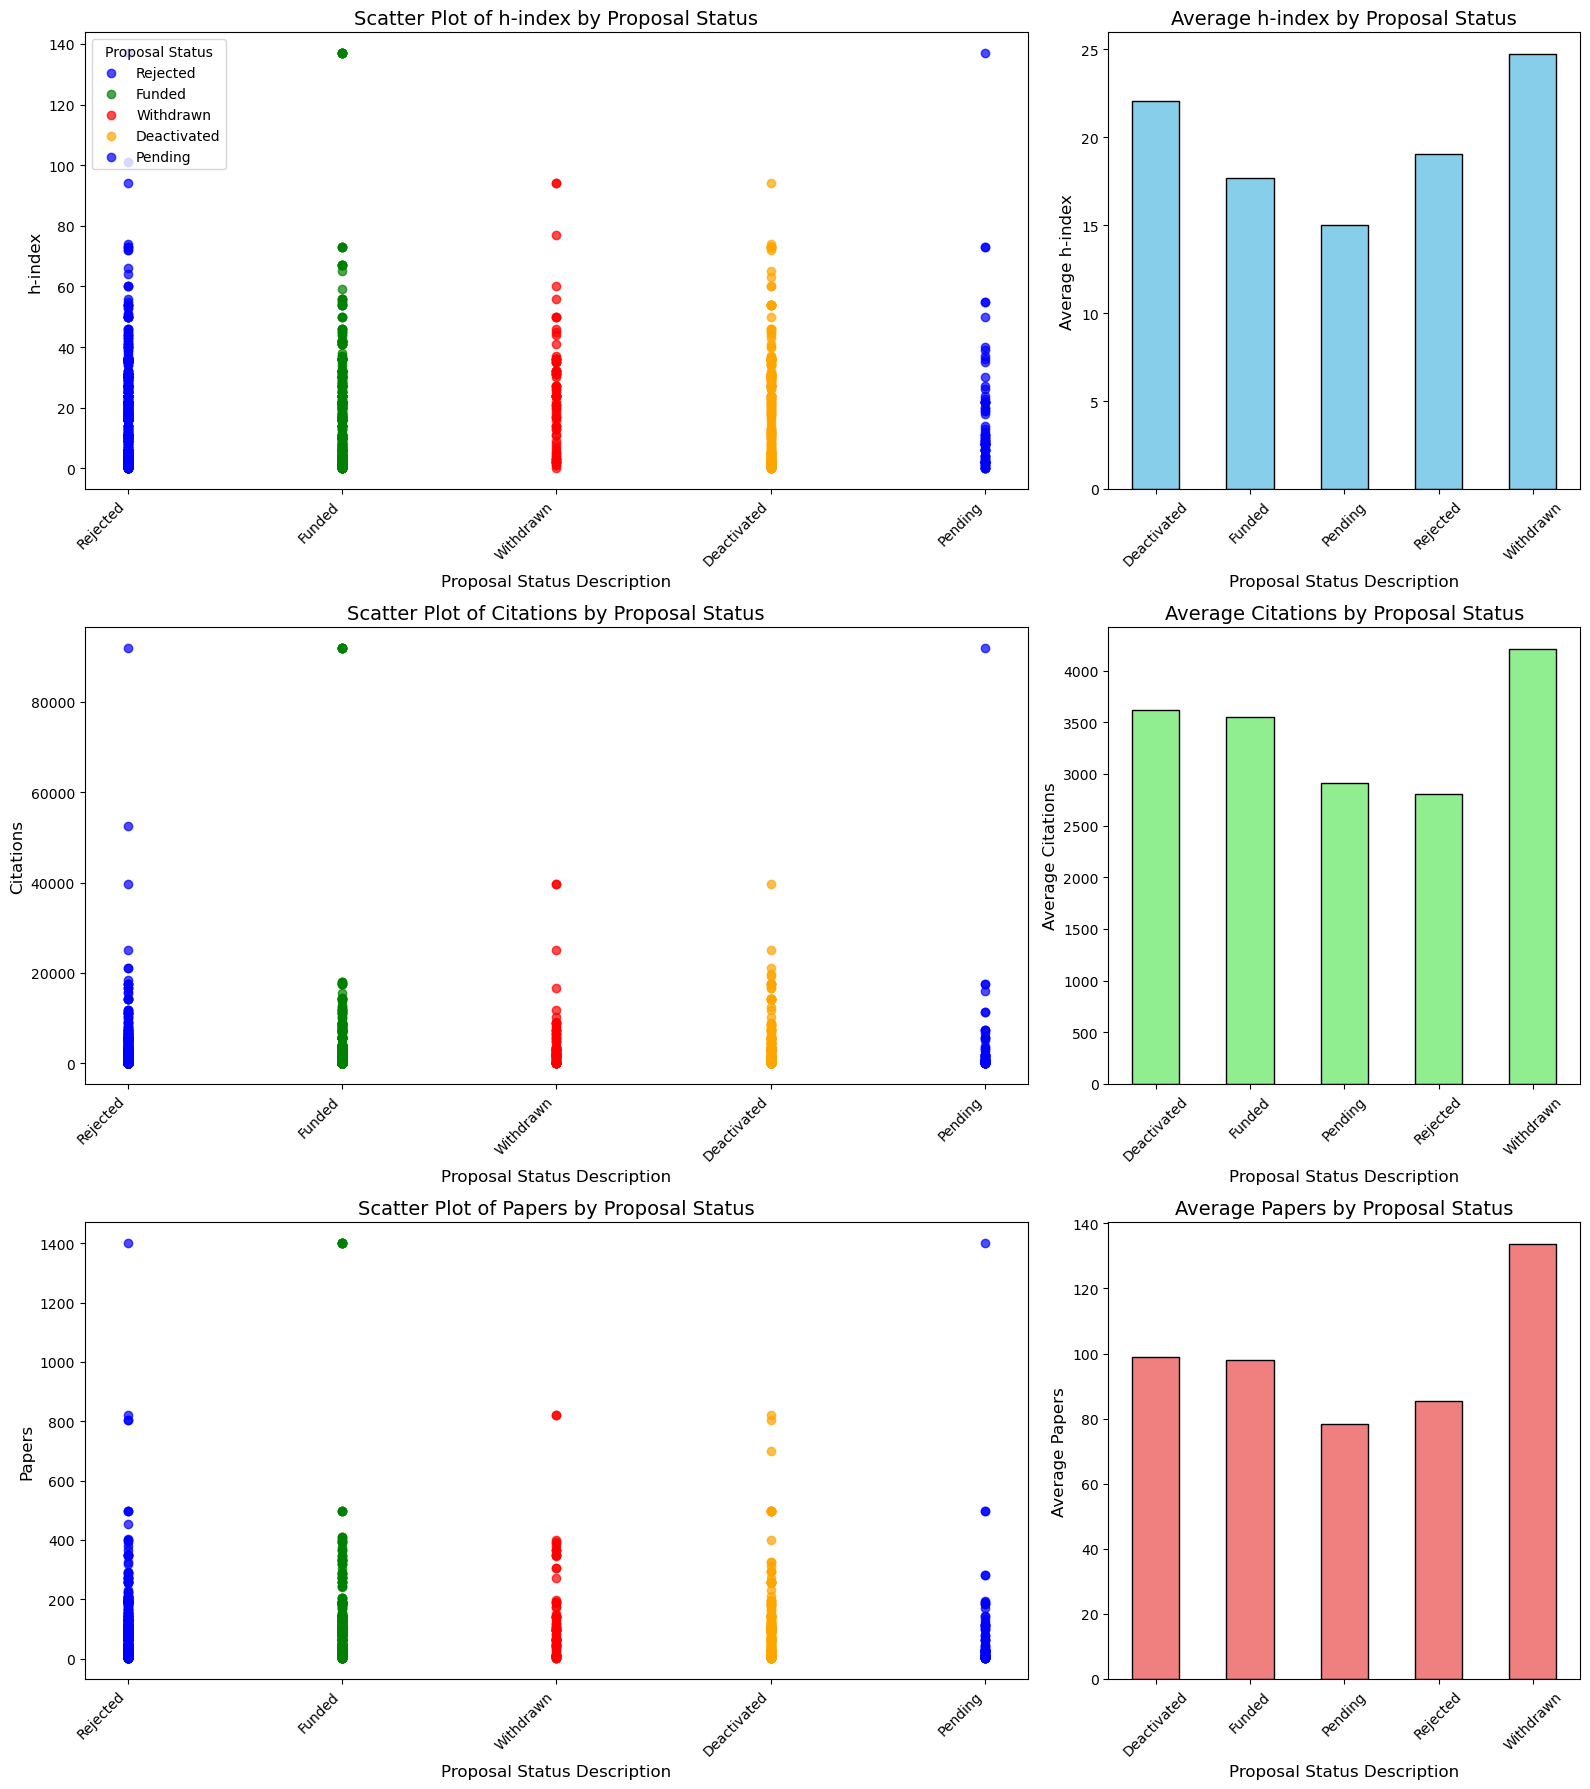

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (assumes 'h_index', 'citations', 'papers', and 'Proposal Status Description' columns exist)
# df = pd.read_csv("data/your_file.csv")

# Drop rows with missing relevant data
df_cleaned = updated_df.dropna(subset=["h_index", "citations", "papers", "Proposal Status Description"])

# Create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 18), gridspec_kw={"width_ratios": [2, 1]})

# Get unique statuses and assign colors
statuses = df_cleaned["Proposal Status Description"].unique()
colors = ["blue", "green", "red", "orange"]

# ---- Scatter Plot: Individual h-index Values ----
for i, status in enumerate(statuses):
    subset = df_cleaned[df_cleaned["Proposal Status Description"] == status]
    axes[0, 0].scatter(
        [status] * len(subset),  # X-axis: Repeated status name
        subset["h_index"],  # Y-axis: h_index values
        color=colors[i % len(colors)],
        label=status,
        alpha=0.7
    )

axes[0, 0].set_title("Scatter Plot of h-index by Proposal Status", fontsize=14)
axes[0, 0].set_ylabel("h-index", fontsize=12)
axes[0, 0].set_xlabel("Proposal Status Description", fontsize=12)
axes[0, 0].set_xticks(range(len(statuses)))
axes[0, 0].set_xticklabels(statuses, rotation=45, ha="right")
axes[0, 0].legend(title="Proposal Status", loc="upper left")

# ---- Bar Chart: Average h-index Values ----
grouped_h_index = df_cleaned.groupby("Proposal Status Description")["h_index"].mean()
grouped_h_index.plot(
    kind="bar",
    color="skyblue",
    edgecolor="black",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Average h-index by Proposal Status", fontsize=14)
axes[0, 1].set_ylabel("Average h-index", fontsize=12)
axes[0, 1].set_xlabel("Proposal Status Description", fontsize=12)
axes[0, 1].tick_params(axis="x", rotation=45)

# ---- Scatter Plot: Individual Citations ----
for i, status in enumerate(statuses):
    subset = df_cleaned[df_cleaned["Proposal Status Description"] == status]
    axes[1, 0].scatter(
        [status] * len(subset),  # X-axis: Repeated status name
        subset["citations"],  # Y-axis: citation values
        color=colors[i % len(colors)],
        label=status,
        alpha=0.7
    )

axes[1, 0].set_title("Scatter Plot of Citations by Proposal Status", fontsize=14)
axes[1, 0].set_ylabel("Citations", fontsize=12)
axes[1, 0].set_xlabel("Proposal Status Description", fontsize=12)
axes[1, 0].set_xticks(range(len(statuses)))
axes[1, 0].set_xticklabels(statuses, rotation=45, ha="right")

# ---- Bar Chart: Average Citations ----
grouped_citations = df_cleaned.groupby("Proposal Status Description")["citations"].mean()
grouped_citations.plot(
    kind="bar",
    color="lightgreen",
    edgecolor="black",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Average Citations by Proposal Status", fontsize=14)
axes[1, 1].set_ylabel("Average Citations", fontsize=12)
axes[1, 1].set_xlabel("Proposal Status Description", fontsize=12)
axes[1, 1].tick_params(axis="x", rotation=45)

# ---- Scatter Plot: Individual Papers ----
for i, status in enumerate(statuses):
    subset = df_cleaned[df_cleaned["Proposal Status Description"] == status]
    axes[2, 0].scatter(
        [status] * len(subset),  # X-axis: Repeated status name
        subset["papers"],  # Y-axis: paper count values
        color=colors[i % len(colors)],
        label=status,
        alpha=0.7
    )

axes[2, 0].set_title("Scatter Plot of Papers by Proposal Status", fontsize=14)
axes[2, 0].set_ylabel("Papers", fontsize=12)
axes[2, 0].set_xlabel("Proposal Status Description", fontsize=12)
axes[2, 0].set_xticks(range(len(statuses)))
axes[2, 0].set_xticklabels(statuses, rotation=45, ha="right")

# ---- Bar Chart: Average Papers ----
grouped_papers = df_cleaned.groupby("Proposal Status Description")["papers"].mean()
grouped_papers.plot(
    kind="bar",
    color="lightcoral",
    edgecolor="black",
    ax=axes[2, 1]
)
axes[2, 1].set_title("Average Papers by Proposal Status", fontsize=14)
axes[2, 1].set_ylabel("Average Papers", fontsize=12)
axes[2, 1].set_xlabel("Proposal Status Description", fontsize=12)
axes[2, 1].tick_params(axis="x", rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [81]:
df_cleaned[df_cleaned['Proposal Status Description'] == 'Funded']

,Notice of Opportunity Description,Opportunity,Notice of Opportunity Code,Proposal ID,Proposal Title,Program Announcement Title,Development Proposal ID,Development Proposal ID.1,Proposal Status Description,Lead Investigator Name,Lead Investigator Organization Name,Sponsor Name,Sponsor - Hierarchy Name ^,Award Id ^,Total Cost,Total Obligated Amount (Award) ^,Proposal Submitted Date,h_index,citations,papers
2,-,#N62473-20-2-0017,-,1008454,DSCESU: Cooperative Agreement: Traditional Cul...,Traditional Cultural Landscape Study in the Vi...,46517,46517,Funded,"Hopkins,Maren P",Bur of Applied Rsch in Anthro,United States Navy,DOD,017305-00001,88695.6,175654.30,9/7/21 0:00,3.0,48.0,21.0
4,-,-,-,116,Use of mass-flux measurement and vapor-phase t...,-,141,141,Funded,"Brusseau,Mark L",Environmental Science-Res,United States Army Corps of Engineers,DOD,003611-00001,673681.0,551567.00,8/4/10 0:00,73.0,17590.0,497.0
11,-,-,-,227,A Counterflow Virtual Impactor Inlet System fo...,-,253,253,Funded,"Sorooshian,Armin",Chemical & Environmental Engr,Office of Naval Research,DOD,003965-00001,100000.0,100000.00,9/10/10 0:00,4.0,49.0,17.0
15,-,-,-,298,Projects in Stochastic Orders and Reliability ...,-,334,334,Funded,"Shaked,Moshe",Mathematics,National Security Agency,DOD,004900-00001,43647.0,42911.24,9/1/10 0:00,41.0,7783.0,205.0
21,-,-,-,458,Putting Network Security on the Map: Visualizi...,-,499,499,Funded,"Kobourov,Stephen G",Computer Science,Office of Naval Research,DOD,000342-00001,399958.0,363752.00,8/30/10 0:00,45.0,8974.0,319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,YIP (Young Investigator Program),DARPA-RA-19-01,11,893312,Distributed quantum sensor networks enhanced b...,Young Faculty Award (YFA),38127,38127,Funded,"Zhuang,Quntao",Electrical and Computer Engr,Defense Advanced Research Projects Agency,DOD,017076-00001,749908.0,623917.00,11/18/19 0:00,0.0,0.0,1.0
1644,YIP (Young Investigator Program),FOA-AFRL-AFOSR-2021-0006,11,997312,"Robust Maximum Entropy Planning, Learning and ...",https://www.grants.gov/web/grants/search-grant...,45785,45785,Funded,"Pacheco,Jason",Computer Science,Air Force Office of Scientific Research,DOD,019401-00001,422611.0,422611.00,7/9/21 0:00,1.0,10.0,2.0
1658,YIP (Young Investigator Program),N00014-15-R-FO13,11,698327,Toward High Performance Tactical Multi-hop Wir...,Fiscal Year 2016 Office of Naval Research Youn...,21359,21359,Funded,"Li,Ming",Electrical and Computer Engr,Office of Naval Research,DOD,010742-00001,509406.0,509406.00,12/1/15 9:03,4.0,40.0,4.0
1659,YIP (Young Investigator Program),N00014-17-S-F014,11,768826,Secondary Instability of Hypersonic Crossflow ...,Funding Opportunity Announcement FY2018 Office...,28668,28668,Funded,"Craig,Stuart",Aerospace & Mechanical Engr,Office of Naval Research,DOD,013624-00001,637519.0,637520.00,9/12/17 10:08,6.0,220.0,23.0


In [80]:
df_cleaned[df_cleaned['Proposal Status Description'] == 'Rejected']['citations'].mean()

2802.9827586206898